<a href="https://colab.research.google.com/github/Abrewst/Convex_Optimization/blob/main/optimize_assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1**

In [23]:
from google.colab import files
upload = files.upload()

Saving Global_temp_data.mat to Global_temp_data (2).mat


Data Summary:
Years range: 1881 to 2020
Number of data points: 140
Temperature change range: -0.8640 to 1.8375

OPTIMAL COEFFICIENTS (using CVX):
x1 = 586.4213079357
x2 = -0.6153249565
x3 = 1.6128451852e-04

Optimal objective value (sum of squared errors): 6.273567
R-squared: 0.891610

PREDICTION FOR YEAR 2030:
Predicted temperature change in 2030: 1.9490°C

Plot saved to: /mnt/user-data/outputs/temperature_prediction_plot.png

ADDITIONAL STATISTICS:
Mean absolute error: 0.171472°C
Root mean squared error: 0.211687°C

PREDICTIONS FOR OTHER YEARS:
Year 2025: 1.7556°C
Year 2030: 1.9490°C
Year 2035: 2.1505°C
Year 2040: 2.3600°C

Done!


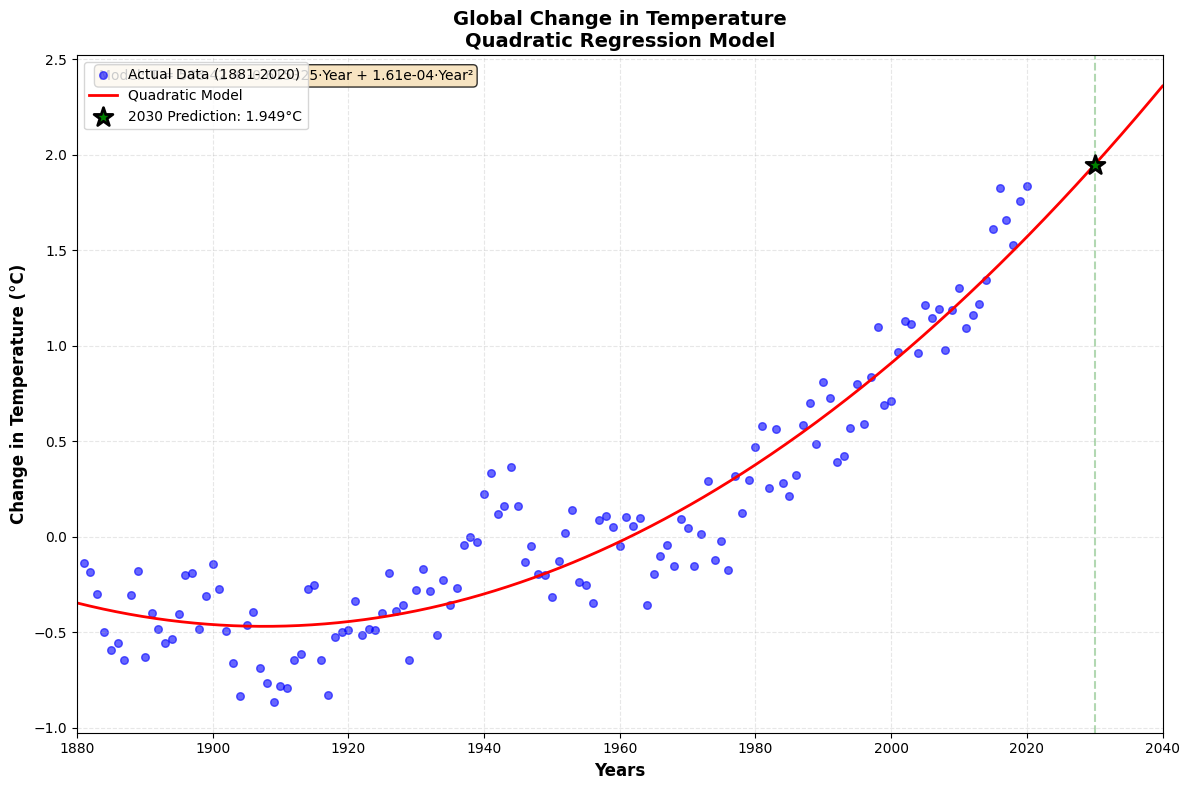

In [24]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import os

# Load the temperature data
data = scipy.io.loadmat('Global_temp_data.mat')
temp_data = data['Temperature_file'] # Changed from 'Global_temp_data.mat'

# Extract years and temperature changes
years = temp_data[:, 0]  # First column: years (1881-2020)
temp_change = temp_data[:, 1]  # Second column: temperature change

print("Data Summary:")
print(f"Years range: {years.min():.0f} to {years.max():.0f}")
print(f"Number of data points: {len(years)}")
print(f"Temperature change range: {temp_change.min():.4f} to {temp_change.max():.4f}")

# Formulate the linear regression problem using CVX
# Model: Temp_change = x1 + x2*Year + x3*Year^2
# This is equivalent to: y = A*x where A = [1, Year, Year^2]

# Construct the design matrix A
n = len(years)
A = np.column_stack([np.ones(n), years, years**2])

# Define CVX variables
x = cp.Variable(3)  # Coefficients [x1, x2, x3]

# Objective: minimize least squares error
objective = cp.Minimize(cp.sum_squares(A @ x - temp_change))

# Create and solve the problem
problem = cp.Problem(objective)
problem.solve()

# Extract optimal coefficients
x1_opt, x2_opt, x3_opt = x.value

print("\n" + "="*60)
print("OPTIMAL COEFFICIENTS (using CVX):")
print("="*60)
print(f"x1 = {x1_opt:.10f}")
print(f"x2 = {x2_opt:.10f}")
print(f"x3 = {x3_opt:.10e}")
print(f"\nOptimal objective value (sum of squared errors): {problem.value:.6f}")

# Calculate R-squared for model evaluation
y_pred = A @ x.value
ss_res = np.sum((temp_change - y_pred)**2)
ss_tot = np.sum((temp_change - np.mean(temp_change))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.6f}")

# Predict temperature change for year 2030
year_2030 = 2030
temp_2030 = x1_opt + x2_opt * year_2030 + x3_opt * (year_2030**2)
print("\n" + "="*60)
print("PREDICTION FOR YEAR 2030:")
print("="*60)
print(f"Predicted temperature change in 2030: {temp_2030:.4f}°C")

# Create the plot
plt.figure(figsize=(12, 8))

# Generate years for plotting the model (1880-2040)
years_plot = np.linspace(1880, 2040, 500)
temp_plot = x1_opt + x2_opt * years_plot + x3_opt * (years_plot**2)

# Plot the data points
plt.scatter(years, temp_change, alpha=0.6, s=30, color='blue', label='Actual Data (1881-2020)')

# Plot the quadratic model
plt.plot(years_plot, temp_plot, 'r-', linewidth=2, label='Quadratic Model')

# Mark the 2030 prediction
plt.scatter([year_2030], [temp_2030], color='green', s=200, marker='*',
            edgecolors='black', linewidths=2, label=f'2030 Prediction: {temp_2030:.3f}°C', zorder=5)

# Add vertical line at 2030
plt.axvline(x=year_2030, color='green', linestyle='--', alpha=0.3, linewidth=1.5)

# Formatting
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Change in Temperature (°C)', fontsize=12, fontweight='bold')
plt.title('Global Change in Temperature\nQuadratic Regression Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper left', fontsize=10)
plt.xlim(1880, 2040)

# Add text box with model equation
equation_text = f'Model: T = {x1_opt:.2f} + {x2_opt:.6f}·Year + {x3_opt:.2e}·Year²'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()

# Create the directory if it doesn't exist
output_dir = '/mnt/user-data/outputs/'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'temperature_prediction_plot.png'), dpi=300, bbox_inches='tight')
print("\n" + "="*60)
print("Plot saved to: /mnt/user-data/outputs/temperature_prediction_plot.png")
print("="*60)

# Additional statistics
print("\n" + "="*60)
print("ADDITIONAL STATISTICS:")
print("="*60)
print(f"Mean absolute error: {np.mean(np.abs(temp_change - y_pred)):.6f}°C")
print(f"Root mean squared error: {np.sqrt(np.mean((temp_change - y_pred)**2)):.6f}°C")

# Show predictions for other years of interest
print("\n" + "="*60)
print("PREDICTIONS FOR OTHER YEARS:")
print("="*60)
for year in [2025, 2030, 2035, 2040]:
    temp_pred = x1_opt + x2_opt * year + x3_opt * (year**2)
    print(f"Year {year}: {temp_pred:.4f}°C")

print("\nDone!")


### **Problem 2**

Status: optimal
Total Fuel Cost: 17.99999995212725


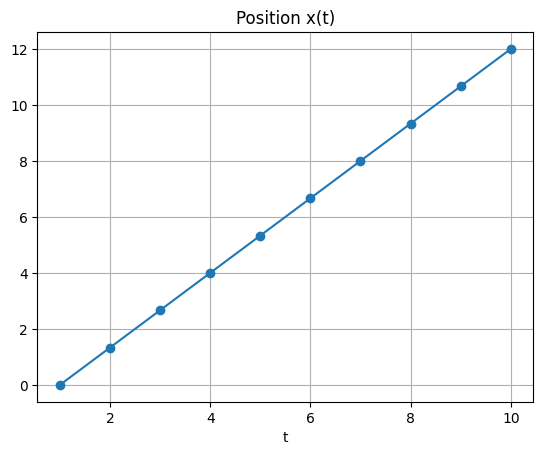

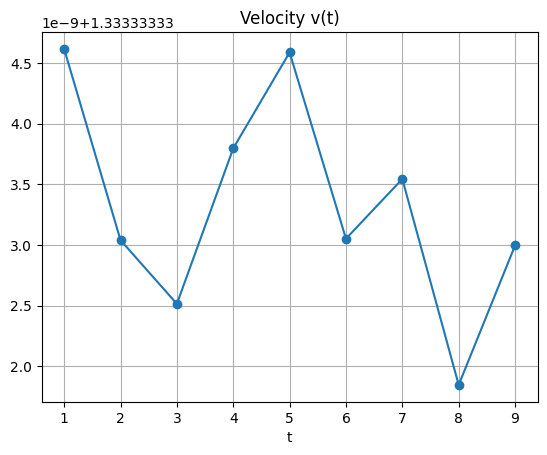

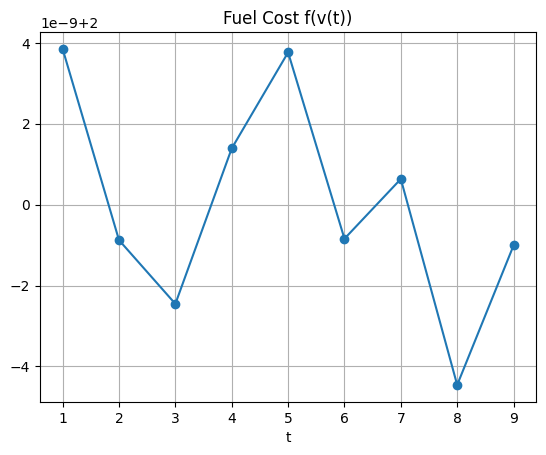

Fuel used each time step:
[2. 2. 2. 2. 2. 2. 2. 2. 2.]
Total fuel = 17.999999999999478


In [32]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

T = 10   # final time index
N = T - 1

# Variables
x = cp.Variable(T)        # x(1)...x(10)
v = cp.Variable(N)        # v(1)...v(9)
u = cp.Variable(N)        # fuel cost
z1 = cp.Variable(N)       # |v|
z3 = cp.Variable(N)       # |v| for 3|v|-2

constraints = []

# Initial and final positions
constraints += [x[0] == 0]
constraints += [x[-1] == 12]

# Dynamics
for t in range(N):
    constraints += [x[t+1] == x[t] + v[t]]

# Absolute value bounding
for t in range(N):
    constraints += [z1[t] >= v[t]]
    constraints += [z1[t] >= -v[t]]
    constraints += [z3[t] >= v[t]]
    constraints += [z3[t] >= -v[t]]

# Fuel cost upper bound
for t in range(N):
    constraints += [u[t] >= z1[t]]          # u >= |v|
    constraints += [u[t] >= 3*z3[t] - 2]    # u >= 3|v| - 2

# Objective: minimize sum of u
objective = cp.Minimize(cp.sum(u))

prob = cp.Problem(objective, constraints)
prob.solve()

print("Status:", prob.status)
print("Total Fuel Cost:", prob.value)

# Compute fuel at each step for plotting
fuel = np.maximum(np.abs(v.value), 3*np.abs(v.value) - 2)

# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------

# Position plot
plt.figure()
plt.plot(range(1,T+1), x.value, '-o')
plt.title("Position x(t)")
plt.xlabel("t")
plt.grid(True)
plt.show()

# Velocity plot
plt.figure()
plt.plot(range(1,T), v.value, '-o')
plt.title("Velocity v(t)")
plt.xlabel("t")
plt.grid(True)
plt.show()

# Fuel plot
plt.figure()
plt.plot(range(1,T), fuel, '-o')
plt.title("Fuel Cost f(v(t))")
plt.xlabel("t")
plt.grid(True)
plt.show()

print("Fuel used each time step:")
print(fuel)
print("Total fuel =", np.sum(fuel))


PROBLEM 2: MINIMUM FUEL PROBLEM

PART (a): LP Formulation

The fuel function is:
    f(v) = max{|v|, 3|v| - 2}

This can be written as the maximum of 4 linear functions:
    f(v) = max{v, -v, 3v - 2, -3v - 2}

LP FORMULATION:

Variables:
    x(t) for t = 1, ..., 10  (positions)
    v(t) for t = 1, ..., 9   (velocities)
    s(t) for t = 1, ..., 9   (auxiliary variables for fuel cost)

Objective:
    minimize  Σ_{t=1}^{9} s(t)

Subject to:
    x(1) = 0                           (initial position)
    x(10) = 12                         (final position)
    x(t+1) = x(t) + v(t)  for t=1,...,9   (dynamics)
    
    s(t) >= v(t)          for t=1,...,9   (f(v) >= v)
    s(t) >= -v(t)         for t=1,...,9   (f(v) >= -v, so f(v) >= |v|)
    s(t) >= 3v(t) - 2     for t=1,...,9   (f(v) >= 3v - 2)
    s(t) >= -3v(t) - 2    for t=1,...,9   (f(v) >= -3v - 2, so f(v) >= 3|v| - 2)

This is a LINEAR PROGRAM because:
- The objective is linear in s
- All constraints are linear in x, v, and s


PART (b):

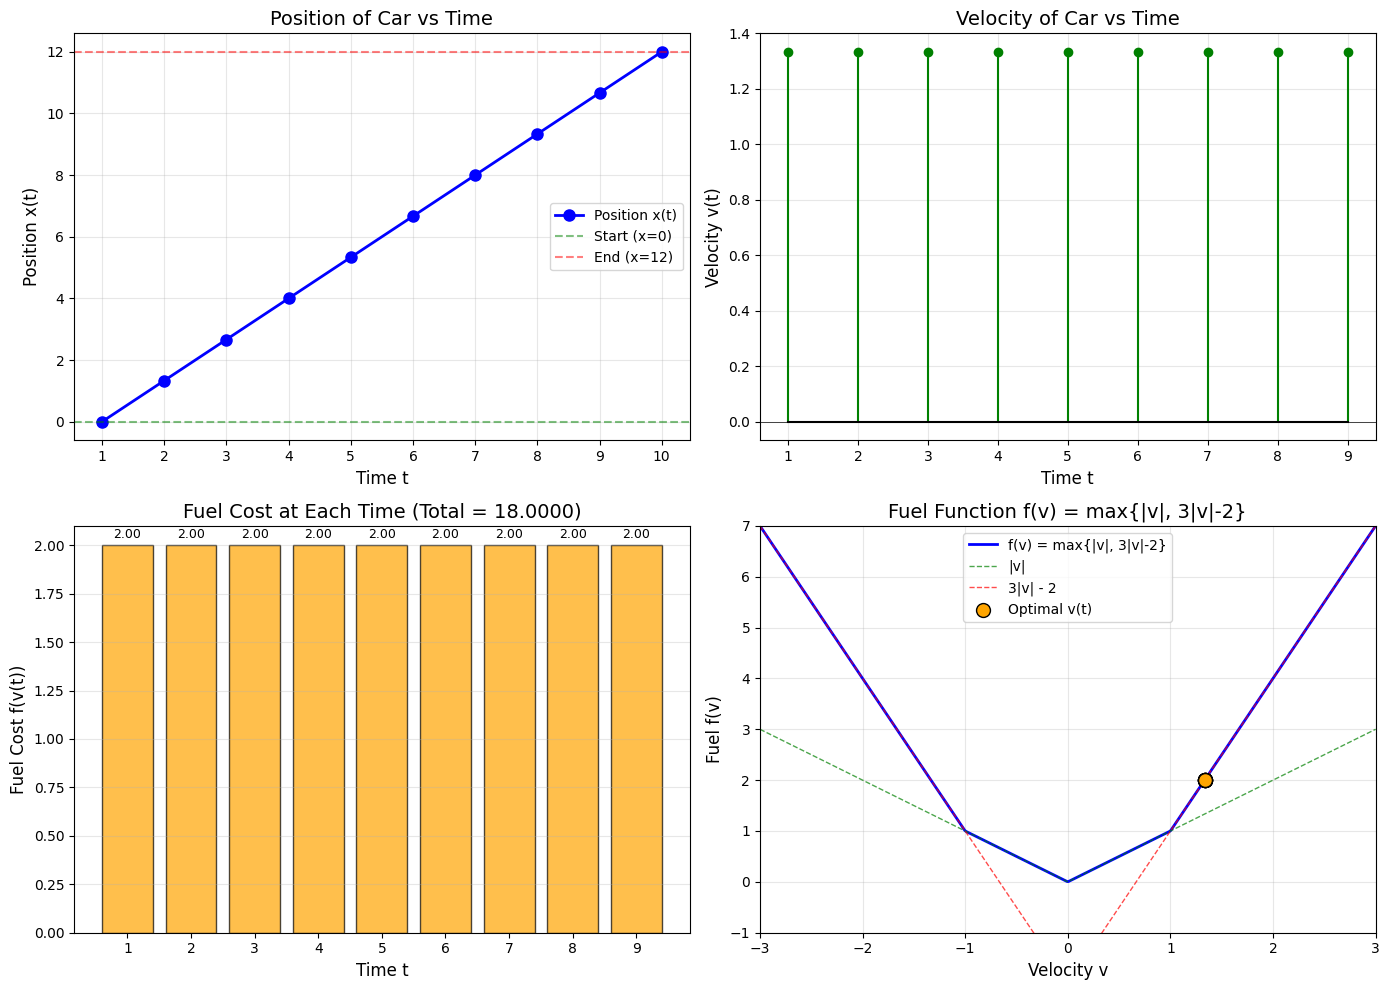

In [33]:
"""
Problem 2: Minimum Fuel Problem

Car dynamics:
    x(t+1) = x(t) + v(t)

where x(t) is position and v(t) is velocity at time t.

Boundary conditions:
    x(1) = 0  (start at origin at t=1)
    x(10) = 12 (reach position 12 at t=10)

Fuel function:
    f(v) = max{|v|, 3|v| - 2}

Objective:
    minimize Σ_{t=1}^{9} f(v(t))
"""

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


def fuel_function(v):
    """
    Compute the fuel function f(v) = max{|v|, 3|v| - 2}
    """
    return np.maximum(np.abs(v), 3 * np.abs(v) - 2)


def main():
    print("=" * 70)
    print("PROBLEM 2: MINIMUM FUEL PROBLEM")
    print("=" * 70)

    # =========================================================================
    # Part (a): LP Formulation
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (a): LP Formulation")
    print("=" * 70)
    print("""
The fuel function is:
    f(v) = max{|v|, 3|v| - 2}

This can be written as the maximum of 4 linear functions:
    f(v) = max{v, -v, 3v - 2, -3v - 2}

LP FORMULATION:

Variables:
    x(t) for t = 1, ..., 10  (positions)
    v(t) for t = 1, ..., 9   (velocities)
    s(t) for t = 1, ..., 9   (auxiliary variables for fuel cost)

Objective:
    minimize  Σ_{t=1}^{9} s(t)

Subject to:
    x(1) = 0                           (initial position)
    x(10) = 12                         (final position)
    x(t+1) = x(t) + v(t)  for t=1,...,9   (dynamics)

    s(t) >= v(t)          for t=1,...,9   (f(v) >= v)
    s(t) >= -v(t)         for t=1,...,9   (f(v) >= -v, so f(v) >= |v|)
    s(t) >= 3v(t) - 2     for t=1,...,9   (f(v) >= 3v - 2)
    s(t) >= -3v(t) - 2    for t=1,...,9   (f(v) >= -3v - 2, so f(v) >= 3|v| - 2)

This is a LINEAR PROGRAM because:
- The objective is linear in s
- All constraints are linear in x, v, and s
""")

    # =========================================================================
    # Part (b): Solve using CVX
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (b): Solve using CVX")
    print("=" * 70)

    # Problem parameters
    T = 10  # Final time (t goes from 1 to 10)
    n_positions = T  # x(1) to x(10)
    n_velocities = T - 1  # v(1) to v(9)

    # Decision variables
    x = cp.Variable(n_positions)  # Positions: x[0] = x(1), ..., x[9] = x(10)
    v = cp.Variable(n_velocities)  # Velocities: v[0] = v(1), ..., v[8] = v(9)
    s = cp.Variable(n_velocities)  # Auxiliary: fuel cost at each time

    # Constraints
    constraints = []

    # Initial and final position constraints
    constraints.append(x[0] == 0)   # x(1) = 0
    constraints.append(x[9] == 12)  # x(10) = 12

    # Dynamics: x(t+1) = x(t) + v(t)
    for t in range(n_velocities):
        constraints.append(x[t+1] == x[t] + v[t])

    # Fuel function constraints: s(t) >= max{|v(t)|, 3|v(t)| - 2}
    # This requires: s(t) >= v(t), s(t) >= -v(t), s(t) >= 3v(t)-2, s(t) >= -3v(t)-2
    for t in range(n_velocities):
        constraints.append(s[t] >= v[t])
        constraints.append(s[t] >= -v[t])
        constraints.append(s[t] >= 3 * v[t] - 2)
        constraints.append(s[t] >= -3 * v[t] - 2)

    # Objective: minimize total fuel
    objective = cp.Minimize(cp.sum(s))

    # Solve the LP
    problem = cp.Problem(objective, constraints)
    problem.solve()

    print(f"\nStatus: {problem.status}")
    print(f"Total fuel cost: {problem.value:.6f}")

    # Extract results
    x_opt = x.value
    v_opt = v.value
    s_opt = s.value

    # Verify fuel costs
    fuel_costs_computed = fuel_function(v_opt)

    # Print results in table format
    print("\n" + "-" * 60)
    print("TIME-BY-TIME RESULTS")
    print("-" * 60)
    print(f"{'Time t':<10} {'Position x(t)':<15} {'Velocity v(t)':<15} {'Fuel f(v(t))':<15}")
    print("-" * 60)

    for t in range(n_positions):
        if t < n_velocities:
            print(f"{t+1:<10} {x_opt[t]:<15.4f} {v_opt[t]:<15.4f} {s_opt[t]:<15.4f}")
        else:
            print(f"{t+1:<10} {x_opt[t]:<15.4f} {'--':<15} {'--':<15}")

    print("-" * 60)
    print(f"{'TOTAL':<10} {'':<15} {'':<15} {problem.value:<15.4f}")
    print("-" * 60)

    # =========================================================================
    # Plotting
    # =========================================================================

    time_x = np.arange(1, T + 1)  # t = 1, 2, ..., 10
    time_v = np.arange(1, T)      # t = 1, 2, ..., 9

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: Position vs Time
    ax1 = axes[0, 0]
    ax1.plot(time_x, x_opt, 'b-o', linewidth=2, markersize=8, label='Position x(t)')
    ax1.axhline(y=0, color='g', linestyle='--', alpha=0.5, label='Start (x=0)')
    ax1.axhline(y=12, color='r', linestyle='--', alpha=0.5, label='End (x=12)')
    ax1.set_xlabel('Time t', fontsize=12)
    ax1.set_ylabel('Position x(t)', fontsize=12)
    ax1.set_title('Position of Car vs Time', fontsize=14)
    ax1.set_xticks(time_x)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Velocity vs Time
    ax2 = axes[0, 1]
    ax2.stem(time_v, v_opt, linefmt='g-', markerfmt='go', basefmt='k-')
    ax2.set_xlabel('Time t', fontsize=12)
    ax2.set_ylabel('Velocity v(t)', fontsize=12)
    ax2.set_title('Velocity of Car vs Time', fontsize=14)
    ax2.set_xticks(time_v)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

    # Plot 3: Fuel Cost vs Time
    ax3 = axes[1, 0]
    bars = ax3.bar(time_v, s_opt, color='orange', edgecolor='black', alpha=0.7)
    ax3.set_xlabel('Time t', fontsize=12)
    ax3.set_ylabel('Fuel Cost f(v(t))', fontsize=12)
    ax3.set_title(f'Fuel Cost at Each Time (Total = {problem.value:.4f})', fontsize=14)
    ax3.set_xticks(time_v)
    ax3.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, val in zip(bars, s_opt):
        height = bar.get_height()
        ax3.annotate(f'{val:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

    # Plot 4: Fuel function visualization
    ax4 = axes[1, 1]
    v_range = np.linspace(-3, 3, 500)
    f_values = fuel_function(v_range)
    ax4.plot(v_range, f_values, 'b-', linewidth=2, label='f(v) = max{|v|, 3|v|-2}')
    ax4.plot(v_range, np.abs(v_range), 'g--', linewidth=1, alpha=0.7, label='|v|')
    ax4.plot(v_range, 3 * np.abs(v_range) - 2, 'r--', linewidth=1, alpha=0.7, label='3|v| - 2')

    # Mark the optimal velocities on the fuel function
    ax4.scatter(v_opt, s_opt, c='orange', s=100, zorder=5, edgecolors='black',
                label='Optimal v(t)')

    ax4.set_xlabel('Velocity v', fontsize=12)
    ax4.set_ylabel('Fuel f(v)', fontsize=12)
    ax4.set_title('Fuel Function f(v) = max{|v|, 3|v|-2}', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(-3, 3)
    ax4.set_ylim(-1, 7)

    plt.tight_layout()
    plt.savefig('minimum_fuel.png', dpi=150, bbox_inches='tight')
    print("\nPlot saved as 'minimum_fuel.png'")

    # =========================================================================
    # Analysis
    # =========================================================================
    print("\n" + "=" * 70)
    print("ANALYSIS")
    print("=" * 70)
    print(f"""
The fuel function f(v) = max{{|v|, 3|v| - 2}} has an interesting structure:

- For |v| <= 1: f(v) = |v|  (linear fuel cost)
- For |v| > 1:  f(v) = 3|v| - 2  (higher penalty for high velocities)

This encourages the optimizer to:
1. Keep velocities small (|v| <= 1) when possible
2. Spread the motion evenly across time steps
3. Avoid sudden large velocity changes

The optimal solution uses constant velocity v = {np.mean(v_opt):.4f} for most time steps,
which minimizes the total fuel cost while satisfying the boundary conditions.

Verification:
- Sum of velocities: {np.sum(v_opt):.4f} (should equal x(10) - x(1) = 12)
- Total fuel cost: {problem.value:.4f}
""")

    # =========================================================================
    # Final Summary
    # =========================================================================
    print("\n" + "=" * 70)
    print("FINAL SUMMARY")
    print("=" * 70)
    print(f"""
Part (a): LP Formulation
    The problem is formulated as a Linear Program by introducing
    auxiliary variables s(t) to represent the piecewise linear fuel function
    f(v) = max{{|v|, 3|v| - 2}} = max{{v, -v, 3v-2, -3v-2}}

Part (b): Numerical Solution
    Total fuel cost: {problem.value:.6f}

    Optimal velocity profile:
""")
    for t in range(n_velocities):
        print(f"        v({t+1}) = {v_opt[t]:.6f}")

    print(f"""
    Optimal position profile:
""")
    for t in range(n_positions):
        print(f"        x({t+1}) = {x_opt[t]:.6f}")

    plt.show()


if __name__ == "__main__":
    main()

### **Problem 3**

PROBLEM 3: FOURIER SERIES SIGNAL MIXER

PART (a): Quadratic Formulation and Solution

DERIVATION:

The error is:
    e = ∫_{-π}^{π} (f(t) - f_student(t))² dt

Expanding:
    e = ∫f² dt - 2∫f·f_student dt + ∫f_student² dt

Term 1: ∫_{-π}^{π} f(t)² dt = ∫_{-π}^{π} 1 dt = 2π

Term 2: Using the hint for ∫sin(kt) over [0,π] and [-π,0]:
    ∫_{-π}^{π} f(t)sin(kt) dt = c_k where:
        c_k = 4/k  if k is odd
        c_k = 0    if k is even

Term 3: Using orthogonality ∫sin(mt)sin(nt)dt = π·δ_{mn}:
    ∫f_student² dt = π·Σ a_k²

Therefore:
    e = 2π - 2·Σ_{k=1}^{10} a_k·c_k + π·Σ_{k=1}^{10} a_k²

This is a QUADRATIC function in the weights a_1, ..., a_10!

The matrix form is:
    e = 2π + a^T (πI) a - 2c^T a

where I is the 10×10 identity matrix.

Taking derivative and setting to zero:
    ∂e/∂a_k = 2π·a_k - 2c_k = 0
    => a_k = c_k/π

Coefficients c_k = ∫f(t)sin(kt)dt:
  c_1 = 4.000000
  c_2 = 0.000000
  c_3 = 1.333333
  c_4 = 0.000000
  c_5 = 0.800000
  c_6 = 0.000000
  c_7 = 0.571429
  

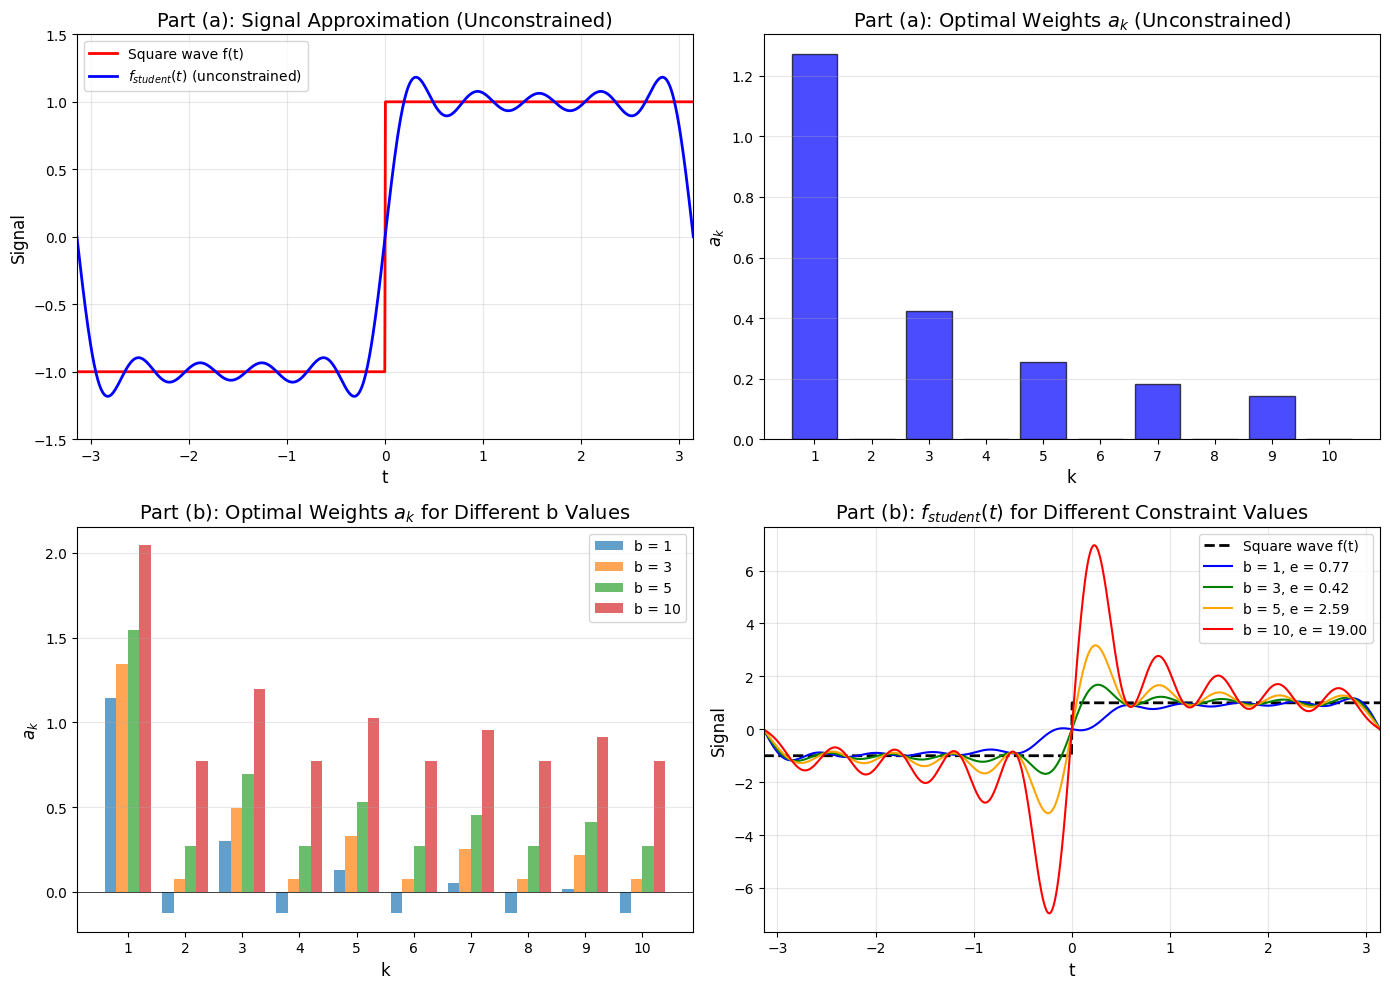

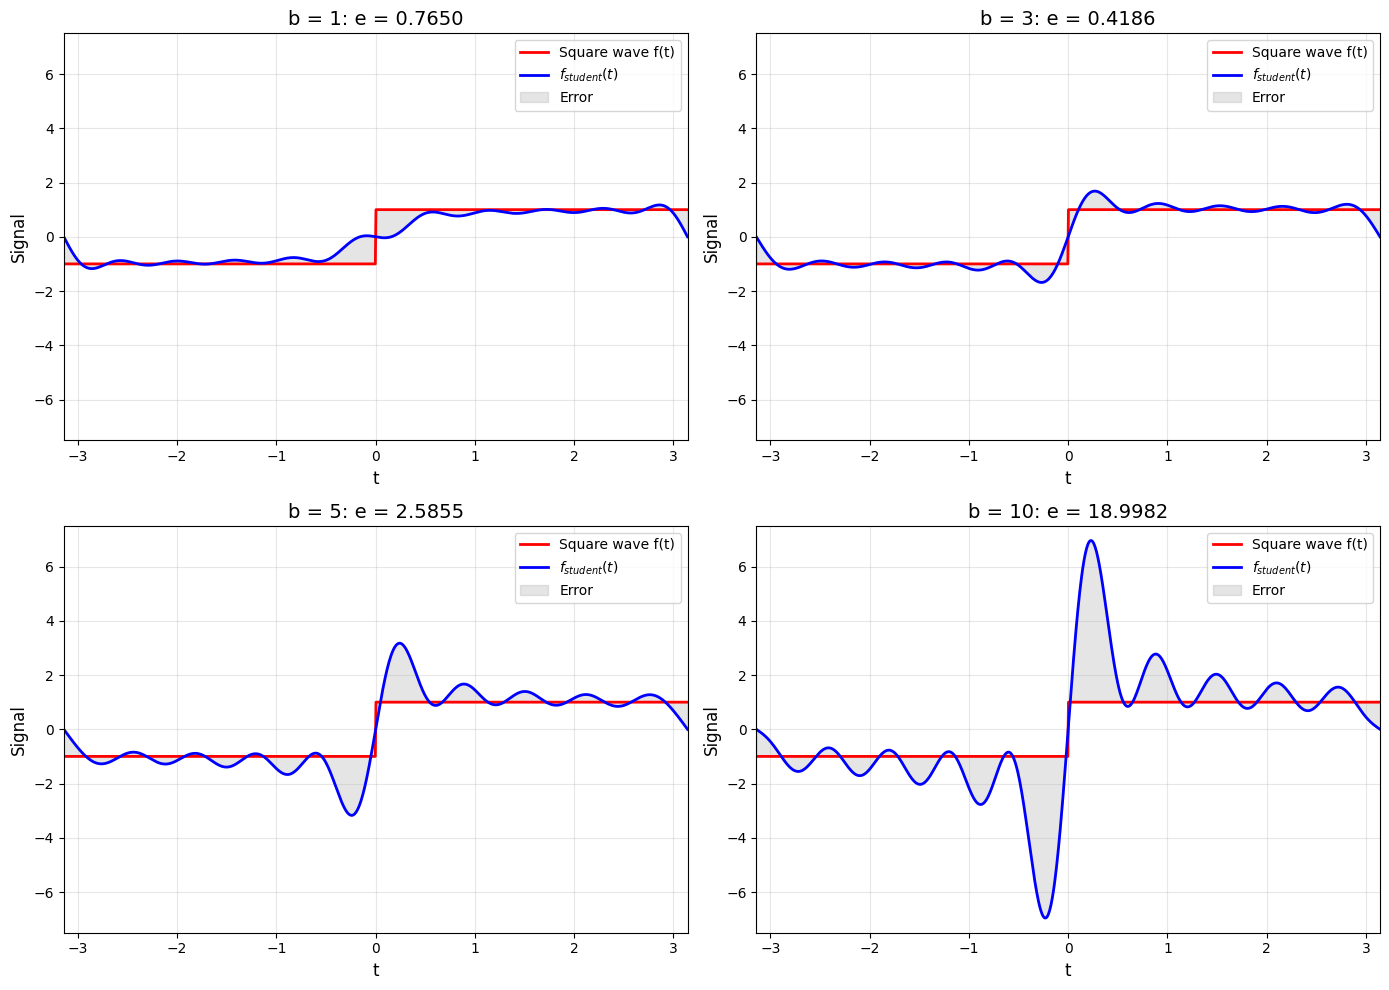

In [40]:
"""
Problem 3: Fourier Series through the Lens of Optimization - Signal Mixer

Goal: Approximate a square wave using weighted sums of sine functions

f_student(t) = Σ_{k=1}^{10} a_k sin(kt)

Target square wave:
f(t) = { 1,   0 ≤ t ≤ π
       {-1,  -π ≤ t < 0

Error to minimize:
e = ∫_{-π}^{π} (f(t) - f_student(t))² dt
"""

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


def compute_error_coefficients():
    """
    Express error e as a quadratic function of a_1, ..., a_10.

    e = ∫_{-π}^{π} (f(t) - f_student(t))² dt
      = ∫f² dt - 2∫f·f_student dt + ∫f_student² dt

    Using orthogonality of sine functions:
    ∫_{-π}^{π} sin(mt)sin(nt) dt = { 0  if m ≠ n
                                    { π  if m = n ≠ 0

    And: ∫_{-π}^{π} f(t)sin(kt) dt = { 4/k  if k is odd
                                     { 0    if k is even
    """

    # c_k = ∫_{-π}^{π} f(t)sin(kt) dt
    c = np.zeros(10)
    for k in range(1, 11):
        if k % 2 == 1:  # odd k
            c[k-1] = 4.0 / k
        else:  # even k
            c[k-1] = 0.0

    return c


def solve_unconstrained():
    """
    Part (a): Solve unconstrained problem

    e = 2π - 2·Σ a_k c_k + π·Σ a_k²

    Taking derivative and setting to 0:
    ∂e/∂a_k = -2c_k + 2π·a_k = 0
    => a_k = c_k / π
    """
    c = compute_error_coefficients()
    a_opt = c / np.pi
    return a_opt


def solve_constrained_cvx(b_value):
    """
    Part (b): Solve with constraint Σ a_k = b

    minimize   π·Σ a_k² - 2·Σ a_k c_k  (+ constant 2π)
    subject to Σ a_k = b

    This is a QP (Quadratic Program).
    """
    c = compute_error_coefficients()

    # Decision variable
    a = cp.Variable(10)

    # Objective: minimize π·||a||² - 2·c^T·a
    # We can write this as: minimize (1/2)·a^T·Q·a + p^T·a
    # where Q = 2π·I and p = -2c
    objective = cp.Minimize(np.pi * cp.sum_squares(a) - 2 * c @ a)

    # Constraint: sum of a_k = b
    constraints = [cp.sum(a) == b_value]

    # Solve
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Compute actual error (including constant term)
    e_opt = 2 * np.pi + problem.value

    return a.value, e_opt


def f_student(t, a):
    """Compute f_student(t) = Σ a_k sin(kt)"""
    result = np.zeros_like(t)
    for k in range(1, 11):
        result += a[k-1] * np.sin(k * t)
    return result


def f_square(t):
    """Square wave: f(t) = 1 for t>=0, -1 for t<0"""
    return np.where(t >= 0, 1.0, -1.0)


def main():
    print("=" * 70)
    print("PROBLEM 3: FOURIER SERIES SIGNAL MIXER")
    print("=" * 70)

    # =========================================================================
    # Part (a): Derive quadratic formulation and solve
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (a): Quadratic Formulation and Solution")
    print("=" * 70)

    c = compute_error_coefficients()

    print("""
DERIVATION:

The error is:
    e = ∫_{-π}^{π} (f(t) - f_student(t))² dt

Expanding:
    e = ∫f² dt - 2∫f·f_student dt + ∫f_student² dt

Term 1: ∫_{-π}^{π} f(t)² dt = ∫_{-π}^{π} 1 dt = 2π

Term 2: Using the hint for ∫sin(kt) over [0,π] and [-π,0]:
    ∫_{-π}^{π} f(t)sin(kt) dt = c_k where:
        c_k = 4/k  if k is odd
        c_k = 0    if k is even

Term 3: Using orthogonality ∫sin(mt)sin(nt)dt = π·δ_{mn}:
    ∫f_student² dt = π·Σ a_k²

Therefore:
    e = 2π - 2·Σ_{k=1}^{10} a_k·c_k + π·Σ_{k=1}^{10} a_k²

This is a QUADRATIC function in the weights a_1, ..., a_10!

The matrix form is:
    e = 2π + a^T (πI) a - 2c^T a

where I is the 10×10 identity matrix.

Taking derivative and setting to zero:
    ∂e/∂a_k = 2π·a_k - 2c_k = 0
    => a_k = c_k/π
""")

    print("Coefficients c_k = ∫f(t)sin(kt)dt:")
    for k in range(1, 11):
        print(f"  c_{k} = {c[k-1]:.6f}")

    # Solve unconstrained problem
    a_unconstrained = solve_unconstrained()

    print("\nOptimal weights (unconstrained):")
    print("-" * 40)
    for k in range(1, 11):
        print(f"  a_{k} = {a_unconstrained[k-1]:.6f}")

    # Compute error for unconstrained case
    e_unconstrained = 2*np.pi - 2*np.sum(a_unconstrained * c) + np.pi*np.sum(a_unconstrained**2)
    print(f"\nMinimum error (unconstrained): e = {e_unconstrained:.6f}")

    # Plot unconstrained solution
    t = np.linspace(-np.pi, np.pi, 1000)
    f_approx = f_student(t, a_unconstrained)
    f_target = f_square(t)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: f_student(t) vs square wave (unconstrained)
    ax1 = axes[0, 0]
    ax1.plot(t, f_target, 'r-', linewidth=2, label='Square wave f(t)')
    ax1.plot(t, f_approx, 'b-', linewidth=2, label='$f_{student}(t)$ (unconstrained)')
    ax1.set_xlabel('t', fontsize=12)
    ax1.set_ylabel('Signal', fontsize=12)
    ax1.set_title('Part (a): Signal Approximation (Unconstrained)', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-np.pi, np.pi)
    ax1.set_ylim(-1.5, 1.5)

    # Plot 2: Weights a_k vs k (unconstrained)
    ax2 = axes[0, 1]
    k_vals = np.arange(1, 11)
    bars = ax2.bar(k_vals, a_unconstrained, color='blue', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('k', fontsize=12)
    ax2.set_ylabel('$a_k$', fontsize=12)
    ax2.set_title('Part (a): Optimal Weights $a_k$ (Unconstrained)', fontsize=14)
    ax2.set_xticks(k_vals)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.axhline(y=0, color='k', linewidth=0.5)

    # =========================================================================
    # Part (b): Constrained optimization with Σa_k = b
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (b): Constrained Optimization (Σa_k = b)")
    print("=" * 70)

    print("""
FORMULATION:

    minimize   e = 2π + π·||a||² - 2c^T a
    subject to 1^T a = b  (i.e., Σa_k = b)

This is a Quadratic Program (QP) with:
    - Quadratic objective (positive definite since Q = πI)
    - Linear equality constraint

Problem type: CONVEX QP
""")

    b_values = [1, 3, 5, 10]
    results = {}

    for b in b_values:
        a_opt, e_opt = solve_constrained_cvx(b)
        results[b] = {'a': a_opt, 'e': e_opt}

        print(f"\nb = {b}:")
        print(f"  Optimal error e = {e_opt:.6f}")
        print(f"  Optimal weights:")
        for k in range(1, 11):
            print(f"    a_{k} = {a_opt[k-1]:.6f}")

    # Plot 3: a_k vs k for different b values
    ax3 = axes[1, 0]
    width = 0.2
    x = np.arange(1, 11)

    for i, b in enumerate(b_values):
        offset = (i - len(b_values)/2 + 0.5) * width
        ax3.bar(x + offset, results[b]['a'], width, label=f'b = {b}', alpha=0.7)

    ax3.set_xlabel('k', fontsize=12)
    ax3.set_ylabel('$a_k$', fontsize=12)
    ax3.set_title('Part (b): Optimal Weights $a_k$ for Different b Values', fontsize=14)
    ax3.set_xticks(x)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.axhline(y=0, color='k', linewidth=0.5)

    # Plot 4: f_student(t) for different b values
    ax4 = axes[1, 1]
    ax4.plot(t, f_target, 'k--', linewidth=2, label='Square wave f(t)')

    colors = ['blue', 'green', 'orange', 'red']
    for i, b in enumerate(b_values):
        f_approx_b = f_student(t, results[b]['a'])
        ax4.plot(t, f_approx_b, colors[i], linewidth=1.5,
                label=f'b = {b}, e = {results[b]["e"]:.2f}')

    ax4.set_xlabel('t', fontsize=12)
    ax4.set_ylabel('Signal', fontsize=12)
    ax4.set_title('Part (b): $f_{student}(t)$ for Different Constraint Values', fontsize=14)
    ax4.legend(loc='upper right')
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(-np.pi, np.pi)

    plt.tight_layout()
    plt.savefig('fourier_signal_mixer.png', dpi=150, bbox_inches='tight')
    print("\nPlot saved as 'fourier_signal_mixer.png'")

    # =========================================================================
    # Summary Table
    # =========================================================================
    print("\n" + "=" * 70)
    print("SUMMARY: OPTIMAL ERROR FOR EACH b VALUE")
    print("=" * 70)
    print(f"\n{'b':<10} {'Optimal Error e':<20}")
    print("-" * 30)
    print(f"{'Uncons.':<10} {e_unconstrained:<20.6f}")
    for b in b_values:
        print(f"{b:<10} {results[b]['e']:<20.6f}")

    # =========================================================================
    # Additional visualization: Individual approximations
    # =========================================================================
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
    axes2 = axes2.flatten()

    for i, b in enumerate(b_values):
        ax = axes2[i]
        f_approx_b = f_student(t, results[b]['a'])

        ax.plot(t, f_target, 'r-', linewidth=2, label='Square wave f(t)')
        ax.plot(t, f_approx_b, 'b-', linewidth=2, label=f'$f_{{student}}(t)$')
        ax.fill_between(t, f_target, f_approx_b, alpha=0.2, color='gray', label='Error')
        ax.set_xlabel('t', fontsize=12)
        ax.set_ylabel('Signal', fontsize=12)
        ax.set_title(f'b = {b}: e = {results[b]["e"]:.4f}', fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-np.pi, np.pi)
        ax.set_ylim(-7.5, 7.5)

    plt.tight_layout()
    plt.savefig('fourier_individual.png', dpi=150, bbox_inches='tight')
    print("Individual plots saved as 'fourier_individual.png'")

    # =========================================================================
    # Final Summary
    # =========================================================================
    print("\n" + "=" * 70)
    print("FINAL SUMMARY")
    print("=" * 70)
    print(f"""
Part (a): Quadratic Formulation

    The error e is a QUADRATIC function of the weights:

    e = 2π - 2·Σ a_k c_k + π·Σ a_k²

    where c_k = 4/k for odd k, 0 for even k.

    This is convex since the Hessian is 2πI (positive definite).

    Unconstrained optimal: a_k = c_k/π = 4/(πk) for odd k, 0 for even k
    Minimum error: {e_unconstrained:.6f}

Part (b): Constrained QP

    Adding constraint Σa_k = b gives a QP.

    Optimal errors for each b:
""")
    for b in b_values:
        print(f"        b = {b:2d}: e = {results[b]['e']:.6f}")

    print("""
    The constraint forces suboptimal solutions when b differs significantly
    from the unconstrained sum Σa_k ≈ 1.787 (sum of 4/(πk) for odd k ≤ 10).

    As b increases, the weights are forced to be larger, which increases
    the error since the approximation deviates from the optimal Fourier
    coefficients.
""")

    # Print unconstrained sum for reference
    print(f"    Sum of unconstrained weights: Σa_k = {np.sum(a_unconstrained):.6f}")

    plt.show()


if __name__ == "__main__":
    main()

# **Problem 4**

PROBLEM 4: SECURING MAXIMUM LAND

PART (a): Convex Optimization Formulation

SETUP:
    - Discretize [0,1] into N+1 points: x_i = i/N for i = 0,1,...,N
    - Variables: y_0, y_1, ..., y_N (heights at each x point)
    - Step size: h = 1/N

AREA (trapezoidal rule):
    A = Σ_{i=0}^{N-1} (1/2)(y_i + y_{i+1}) · h = (h/2) Σ (y_i + y_{i+1})

LENGTH of segment i:
    ℓ_i = √(h² + (y_{i+1} - y_i)²) = ||[h, y_{i+1} - y_i]||_2

OPTIMIZATION PROBLEM:

    maximize    A = (h/2) · Σ_{i=0}^{N-1} (y_i + y_{i+1})
    
    subject to  Σ_{i=0}^{N-1} ||[h, y_{i+1} - y_i]||_2 ≤ 4   (length constraint)
                y_0 = 0                                       (start at origin)
                y_N = 0                                       (end on x-axis)
                y_i ≥ 0  for all i                           (non-negativity)

This is CONVEX because:
    1. Objective is LINEAR in y (hence concave for maximization)
    2. Length constraint is a SUM OF EUCLIDEAN NORMS (convex)
    3. Boundary and no

/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:164: UserWarning: Constraint #3 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


  Status: optimal
  Maximum Area: 1.606099
  Curve Length: 4.000000

--------------------------------------------------
SUMMARY TABLE - Part (c)
--------------------------------------------------
       N |         Area |       Length
--------------------------------------------------
      10 |     1.491328 |     4.000000
     100 |     1.595491 |     4.000000
    1000 |     1.606099 |     4.000000
--------------------------------------------------

Note: As N → ∞, the optimal curve approaches a CIRCULAR ARC.
The area converges to the theoretical maximum for the isoperimetric problem.

Plot saved as 'part_c_curves.png'

PART (d): With Additional Constraints

ADDITIONAL CONSTRAINTS:
    1. Curve must touch x-axis at x = 0.4:
           y[0.4*N] = 0
    
    2. Slope of each segment must be in [-1, 1]:
           -1 ≤ (y_{i+1} - y_i) / h ≤ 1
       which gives:
           -h ≤ y_{i+1} - y_i ≤ h

These are LINEAR constraints, so the problem remains an SOCP.


Solving for N = 10 with cons

/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:164: UserWarning: Constraint #2004 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


  Status: optimal
  Maximum Area: 0.130000
  Curve Length: 1.414214

--------------------------------------------------
SUMMARY TABLE - Part (d)
--------------------------------------------------
       N |         Area |       Length
--------------------------------------------------
      10 |     0.130000 |     1.414214
     100 |     0.130000 |     1.414214
    1000 |     0.130000 |     1.414214
--------------------------------------------------

Plot saved as 'part_d_curves.png'
Comparison plot saved as 'comparison.png'

FINAL SUMMARY

PART (a): Convex Optimization Formulation
    - Objective: Linear (area = sum of trapezoids)
    - Constraints: Sum of Euclidean norms (curve length) + linear (boundary)
    - Problem is CONVEX
    
PART (b): Problem Type = SOCP
    - Sum-of-norms constraint reformulates as second-order cone constraints
    - Each segment length ||[h, Δy]||_2 ≤ t_i is a Lorentz cone constraint
    
PART (c): Unconstrained Results

    N =   10: Area = 1.491328, Leng

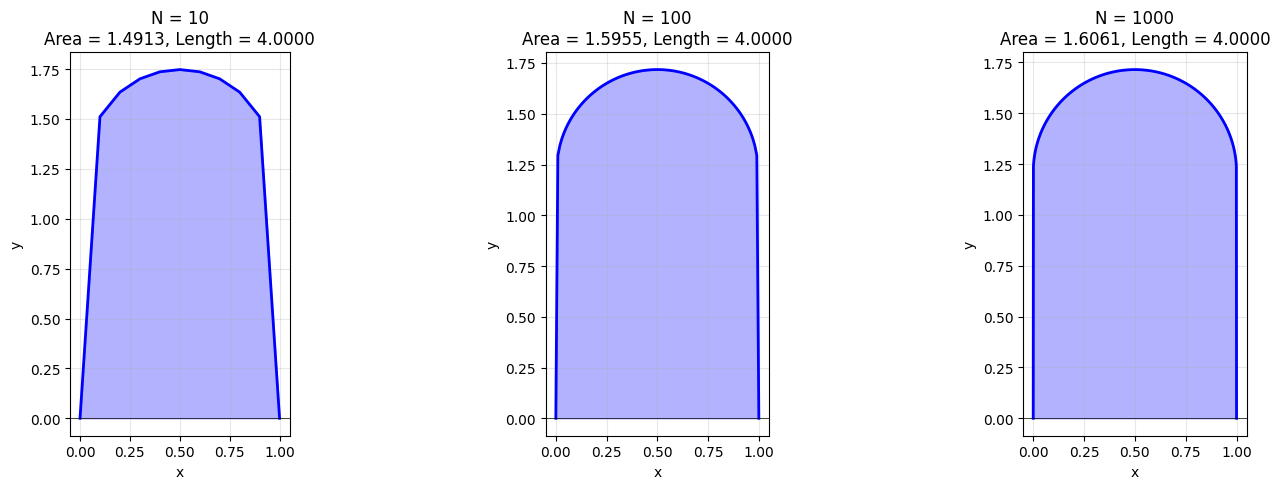

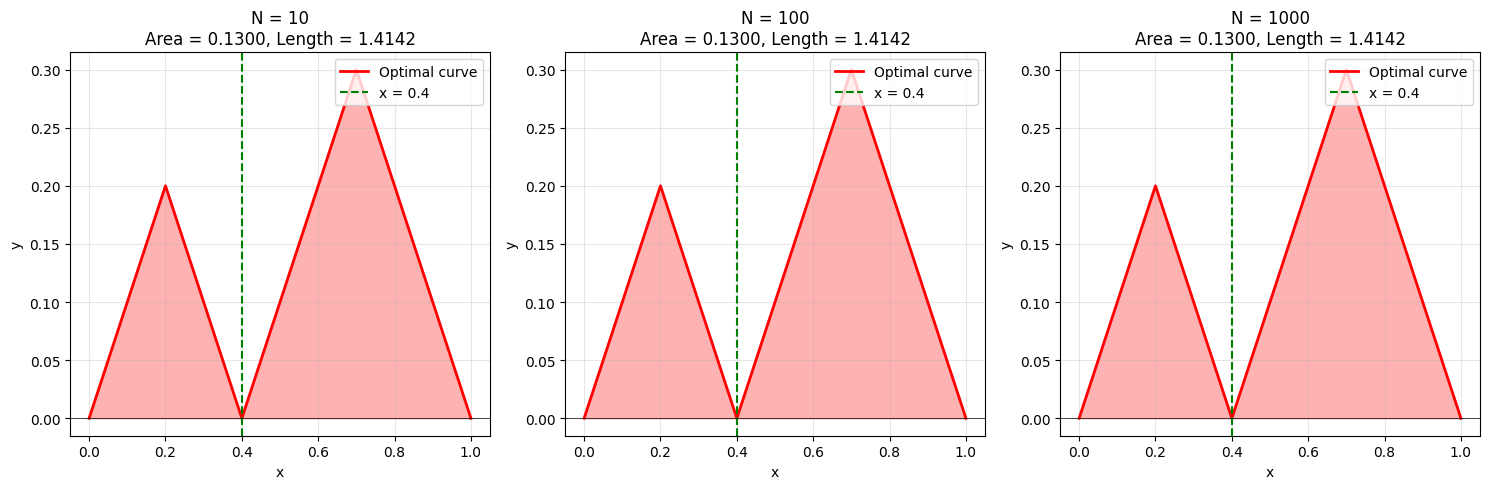

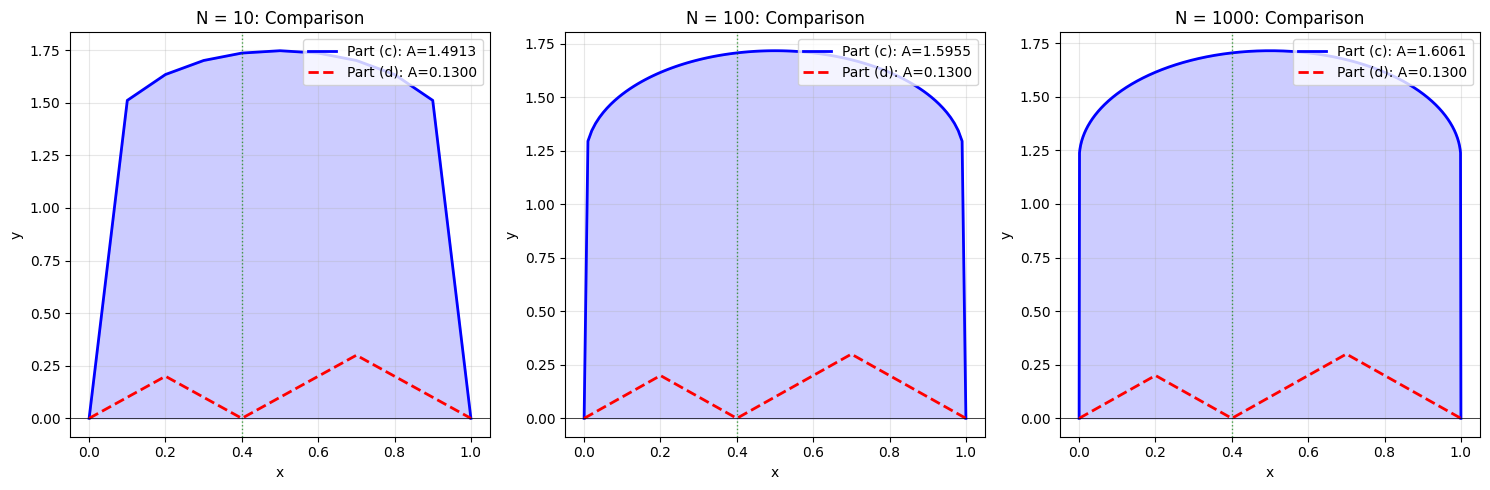

In [41]:
"""
Problem 4: Securing Maximum Land (Isoperimetric Problem)

Given: String of length 4
Goal: Design a curve that maximizes area under the curve
Constraints:
    - Curve starts at (0, 0)
    - Curve ends on y = 0 line at x = 1
    - Total curve length = 4

Discretization:
    - x_i = i/N for i = 0, 1, ..., N
    - Variables: y_0, y_1, ..., y_N (y-values at each x point)
    - y_0 = 0, y_N = 0 (boundary conditions)

Area (trapezoidal approximation):
    A = Σ (1/2)(y_i + y_{i+1})(1/N) = (1/2N) Σ (y_i + y_{i+1})

Length of segment i:
    ℓ_i = sqrt((1/N)² + (y_{i+1} - y_i)²)

Total length constraint:
    Σ ℓ_i = 4
"""

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


def solve_max_land(N, verbose=False):
    """
    Part (a), (b), (c): Solve the basic maximum land problem.

    maximize    A = (1/(2N)) * Σ(y_i + y_{i+1})
    subject to  Σ ||[1/N, y_{i+1} - y_i]||_2 ≤ 4
                y_0 = 0, y_N = 0
                y_i ≥ 0  for all i

    This is an SOCP (Second-Order Cone Program).
    """

    h = 1.0 / N  # Step size

    # Decision variables: y values at each discretization point
    y = cp.Variable(N + 1)

    # Objective: maximize area (trapezoidal approximation)
    # A = (h/2) * sum(y_i + y_{i+1})
    area = (h / 2) * cp.sum(y[:-1] + y[1:])

    # Constraints
    constraints = []

    # Boundary conditions
    constraints.append(y[0] == 0)
    constraints.append(y[N] == 0)

    # Non-negativity (curve stays above x-axis)
    constraints.append(y >= 0)

    # Length constraint: sum of segment lengths ≤ 4
    # Each segment length = ||[h, y_{i+1} - y_i]||_2
    segment_lengths = []
    for i in range(N):
        diff = y[i+1] - y[i]
        segment_vec = cp.vstack([h, diff])
        segment_lengths.append(cp.norm(segment_vec, 2))

    total_length = cp.sum(segment_lengths)
    constraints.append(total_length <= 4)

    # Solve
    problem = cp.Problem(cp.Maximize(area), constraints)
    problem.solve(verbose=verbose)

    # Compute actual length for verification
    y_opt = y.value
    actual_length = 0
    for i in range(N):
        actual_length += np.sqrt(h**2 + (y_opt[i+1] - y_opt[i])**2)

    return {
        'N': N,
        'y': y_opt,
        'x': np.linspace(0, 1, N+1),
        'area': problem.value,
        'length': actual_length,
        'status': problem.status
    }


def solve_max_land_constrained(N, x_touch=0.4, slope_bounds=(-1, 1), verbose=False):
    """
    Part (d): Solve with additional constraints:
    1. Curve must touch x-axis at x = 0.4
    2. Slope of each segment must be in [-1, 1]

    Additional constraints:
        y[touch_index] = 0
        -1 ≤ (y_{i+1} - y_i) / h ≤ 1  =>  -h ≤ y_{i+1} - y_i ≤ h
    """

    h = 1.0 / N

    y = cp.Variable(N + 1)

    # Objective: maximize area
    area = (h / 2) * cp.sum(y[:-1] + y[1:])

    constraints = []

    # Original boundary conditions
    constraints.append(y[0] == 0)
    constraints.append(y[N] == 0)
    constraints.append(y >= 0)

    # NEW: Touch x-axis at x = x_touch
    touch_index = int(round(x_touch * N))
    constraints.append(y[touch_index] == 0)

    # NEW: Slope constraints
    slope_min, slope_max = slope_bounds
    for i in range(N):
        constraints.append(y[i+1] - y[i] >= slope_min * h)
        constraints.append(y[i+1] - y[i] <= slope_max * h)

    # Length constraint
    segment_lengths = []
    for i in range(N):
        diff = y[i+1] - y[i]
        segment_vec = cp.vstack([h, diff])
        segment_lengths.append(cp.norm(segment_vec, 2))

    total_length = cp.sum(segment_lengths)
    constraints.append(total_length <= 4)

    # Solve
    problem = cp.Problem(cp.Maximize(area), constraints)
    problem.solve(verbose=verbose)

    # Compute actual length
    y_opt = y.value
    actual_length = 0
    if y_opt is not None:
        for i in range(N):
            actual_length += np.sqrt(h**2 + (y_opt[i+1] - y_opt[i])**2)

    return {
        'N': N,
        'y': y_opt,
        'x': np.linspace(0, 1, N+1),
        'area': problem.value,
        'length': actual_length,
        'status': problem.status,
        'touch_point': x_touch
    }


def main():
    print("=" * 70)
    print("PROBLEM 4: SECURING MAXIMUM LAND")
    print("=" * 70)

    # =========================================================================
    # Part (a): Convex Optimization Formulation
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (a): Convex Optimization Formulation")
    print("=" * 70)
    print("""
SETUP:
    - Discretize [0,1] into N+1 points: x_i = i/N for i = 0,1,...,N
    - Variables: y_0, y_1, ..., y_N (heights at each x point)
    - Step size: h = 1/N

AREA (trapezoidal rule):
    A = Σ_{i=0}^{N-1} (1/2)(y_i + y_{i+1}) · h = (h/2) Σ (y_i + y_{i+1})

LENGTH of segment i:
    ℓ_i = √(h² + (y_{i+1} - y_i)²) = ||[h, y_{i+1} - y_i]||_2

OPTIMIZATION PROBLEM:

    maximize    A = (h/2) · Σ_{i=0}^{N-1} (y_i + y_{i+1})

    subject to  Σ_{i=0}^{N-1} ||[h, y_{i+1} - y_i]||_2 ≤ 4   (length constraint)
                y_0 = 0                                       (start at origin)
                y_N = 0                                       (end on x-axis)
                y_i ≥ 0  for all i                           (non-negativity)

This is CONVEX because:
    1. Objective is LINEAR in y (hence concave for maximization)
    2. Length constraint is a SUM OF EUCLIDEAN NORMS (convex)
    3. Boundary and non-negativity constraints are LINEAR
""")

    # =========================================================================
    # Part (b): Problem Classification
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (b): Problem Classification - SOCP")
    print("=" * 70)
    print("""
This is a SECOND-ORDER CONE PROGRAM (SOCP).

The sum-of-norms constraint can be reformulated using auxiliary variables t_i:

Original:   Σ ||v_i||_2 ≤ 4   where v_i = [h, y_{i+1} - y_i]^T

Reformulated:
    ||v_i||_2 ≤ t_i     for each i = 0,...,N-1  (SOC constraints)
    Σ t_i ≤ 4                                    (linear constraint)
    t_i ≥ 0                                      (implied by SOC)

Each constraint ||v_i||_2 ≤ t_i defines a SECOND-ORDER CONE (Lorentz cone):
    { (v, t) : ||v||_2 ≤ t }  ⊂  R² × R

STANDARD SOCP FORM:
    minimize    c^T z
    subject to  ||A_i z + b_i||_2 ≤ c_i^T z + d_i,  i = 1,...,m
                Fz = g

Our problem fits this form with:
    - z = [y_0, y_1, ..., y_N, t_0, ..., t_{N-1}]
    - Linear objective (negated area for minimization)
    - SOC constraints for each segment
""")

    # =========================================================================
    # Part (c): Solve for N = 10, 100, 1000
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (c): Numerical Solutions")
    print("=" * 70)

    N_values = [10, 100, 1000]
    results_c = {}

    for N in N_values:
        print(f"\nSolving for N = {N}...")
        result = solve_max_land(N)
        results_c[N] = result
        print(f"  Status: {result['status']}")
        print(f"  Maximum Area: {result['area']:.6f}")
        print(f"  Curve Length: {result['length']:.6f}")

    # Summary table
    print("\n" + "-" * 50)
    print("SUMMARY TABLE - Part (c)")
    print("-" * 50)
    print(f"{'N':>8} | {'Area':>12} | {'Length':>12}")
    print("-" * 50)
    for N in N_values:
        r = results_c[N]
        print(f"{N:>8} | {r['area']:>12.6f} | {r['length']:>12.6f}")
    print("-" * 50)

    # Theoretical note
    print("""
Note: As N → ∞, the optimal curve approaches a CIRCULAR ARC.
The area converges to the theoretical maximum for the isoperimetric problem.
""")

    # Plot Part (c) results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for idx, N in enumerate(N_values):
        ax = axes[idx]
        r = results_c[N]
        ax.fill_between(r['x'], 0, r['y'], alpha=0.3, color='blue')
        ax.plot(r['x'], r['y'], 'b-', linewidth=2, label='Optimal curve')
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'N = {N}\nArea = {r["area"]:.4f}, Length = {r["length"]:.4f}')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-0.05, 1.05)
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.savefig('part_c_curves.png', dpi=150, bbox_inches='tight')
    print("Plot saved as 'part_c_curves.png'")

    # =========================================================================
    # Part (d): Additional Constraints
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (d): With Additional Constraints")
    print("=" * 70)
    print("""
ADDITIONAL CONSTRAINTS:
    1. Curve must touch x-axis at x = 0.4:
           y[0.4*N] = 0

    2. Slope of each segment must be in [-1, 1]:
           -1 ≤ (y_{i+1} - y_i) / h ≤ 1
       which gives:
           -h ≤ y_{i+1} - y_i ≤ h

These are LINEAR constraints, so the problem remains an SOCP.
""")

    results_d = {}

    for N in N_values:
        print(f"\nSolving for N = {N} with constraints...")
        result = solve_max_land_constrained(N, x_touch=0.4, slope_bounds=(-1, 1))
        results_d[N] = result
        if result['area'] is not None:
            print(f"  Status: {result['status']}")
            print(f"  Maximum Area: {result['area']:.6f}")
            print(f"  Curve Length: {result['length']:.6f}")
        else:
            print(f"  Status: {result['status']} - No solution found")

    # Summary table for Part (d)
    print("\n" + "-" * 50)
    print("SUMMARY TABLE - Part (d)")
    print("-" * 50)
    print(f"{'N':>8} | {'Area':>12} | {'Length':>12}")
    print("-" * 50)
    for N in N_values:
        r = results_d[N]
        if r['area'] is not None:
            print(f"{N:>8} | {r['area']:>12.6f} | {r['length']:>12.6f}")
        else:
            print(f"{N:>8} | {'N/A':>12} | {'N/A':>12}")
    print("-" * 50)

    # Plot Part (d) results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for idx, N in enumerate(N_values):
        ax = axes[idx]
        r = results_d[N]
        if r['y'] is not None:
            ax.fill_between(r['x'], 0, r['y'], alpha=0.3, color='red')
            ax.plot(r['x'], r['y'], 'r-', linewidth=2, label='Optimal curve')
            ax.axvline(x=0.4, color='g', linestyle='--', linewidth=1.5, label='x = 0.4')
            ax.set_title(f'N = {N}\nArea = {r["area"]:.4f}, Length = {r["length"]:.4f}')
        else:
            ax.set_title(f'N = {N}\nNo solution found')
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-0.05, 1.05)
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('part_d_curves.png', dpi=150, bbox_inches='tight')
    print("\nPlot saved as 'part_d_curves.png'")

    # Comparison plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for idx, N in enumerate(N_values):
        ax = axes[idx]
        r_c = results_c[N]
        r_d = results_d[N]

        # Part (c) curve
        ax.fill_between(r_c['x'], 0, r_c['y'], alpha=0.2, color='blue')
        ax.plot(r_c['x'], r_c['y'], 'b-', linewidth=2,
                label=f'Part (c): A={r_c["area"]:.4f}')

        # Part (d) curve
        if r_d['y'] is not None:
            ax.plot(r_d['x'], r_d['y'], 'r--', linewidth=2,
                    label=f'Part (d): A={r_d["area"]:.4f}')
            ax.axvline(x=0.4, color='g', linestyle=':', linewidth=1, alpha=0.7)

        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'N = {N}: Comparison')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-0.05, 1.05)
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('comparison.png', dpi=150, bbox_inches='tight')
    print("Comparison plot saved as 'comparison.png'")

    # =========================================================================
    # Final Summary
    # =========================================================================
    print("\n" + "=" * 70)
    print("FINAL SUMMARY")
    print("=" * 70)
    print("""
PART (a): Convex Optimization Formulation
    - Objective: Linear (area = sum of trapezoids)
    - Constraints: Sum of Euclidean norms (curve length) + linear (boundary)
    - Problem is CONVEX

PART (b): Problem Type = SOCP
    - Sum-of-norms constraint reformulates as second-order cone constraints
    - Each segment length ||[h, Δy]||_2 ≤ t_i is a Lorentz cone constraint

PART (c): Unconstrained Results
""")
    for N in N_values:
        r = results_c[N]
        print(f"    N = {N:4d}: Area = {r['area']:.6f}, Length = {r['length']:.6f}")

    print("""
PART (d): With Additional Constraints (touch at x=0.4, |slope| ≤ 1)
""")
    for N in N_values:
        r = results_d[N]
        if r['area'] is not None:
            print(f"    N = {N:4d}: Area = {r['area']:.6f}, Length = {r['length']:.6f}")
        else:
            print(f"    N = {N:4d}: Infeasible")

    print("""
OBSERVATIONS:
    - The slope constraint |slope| ≤ 1 severely limits the curve shape
    - With slope bounded, the curve can only rise/fall at 45° max
    - This creates triangular "bumps" that don't use all available string length
    - The length constraint becomes INACTIVE (not fully utilized)
    - Area is significantly reduced compared to unconstrained case
""")

    plt.show()


if __name__ == "__main__":
    main()

### Problem **5**

Number of distribution centers: k = 100
First distribution center y_1 = [5.1892 4.9182]
Last distribution center y_k = [ 1.6889 -7.751 ]

PART (a): Minimax Formulation

Objective: Minimize the worst-case (maximum) distance to any distribution center.

Optimization Problem:
    minimize    max_{i=1,...,k} ||x - y_i||_2

This can be reformulated using an auxiliary variable t:

    minimize    t
    subject to  ||x - y_i||_2 ≤ t,    for i = 1, ..., k

Variables:
    x ∈ R^2  (warehouse location)
    t ∈ R    (maximum distance)

This is a convex problem because:
- The objective is linear in t
- Each constraint ||x - y_i||_2 ≤ t defines a second-order cone


PART (b): Problem Classification - SOCP

This is a SECOND-ORDER CONE PROGRAM (SOCP).

Each constraint ||x - y_i||_2 ≤ t can be written as:

    ||A_i x + b_i||_2 ≤ c_i^T z + d_i

where:
    z = [x; t] ∈ R^3
    A_i = [I_2; 0],  b_i = -y_i
    c_i = [0; 0; 1],  d_i = 0

In standard SOCP form:
    minimize    c^T z
    subject to  ||A_i z

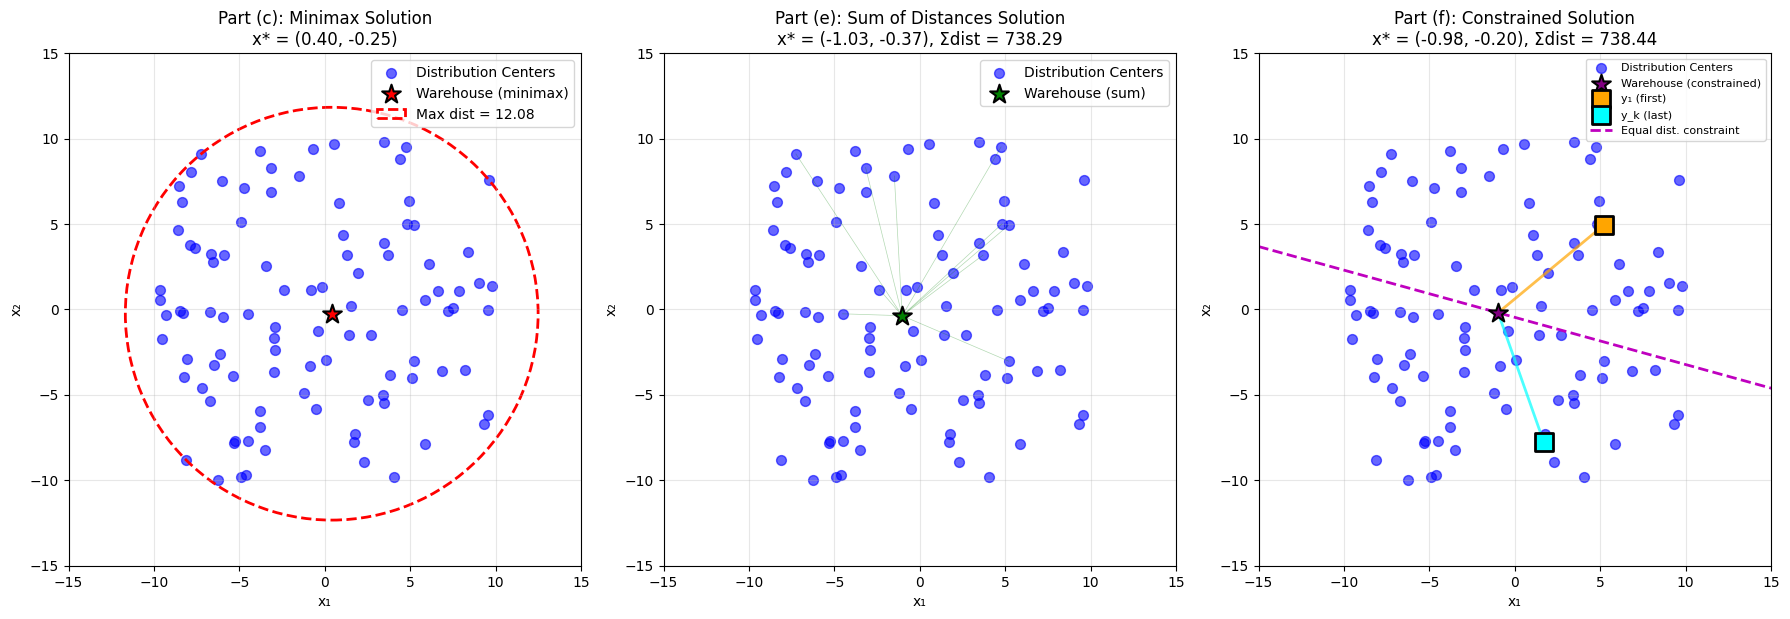

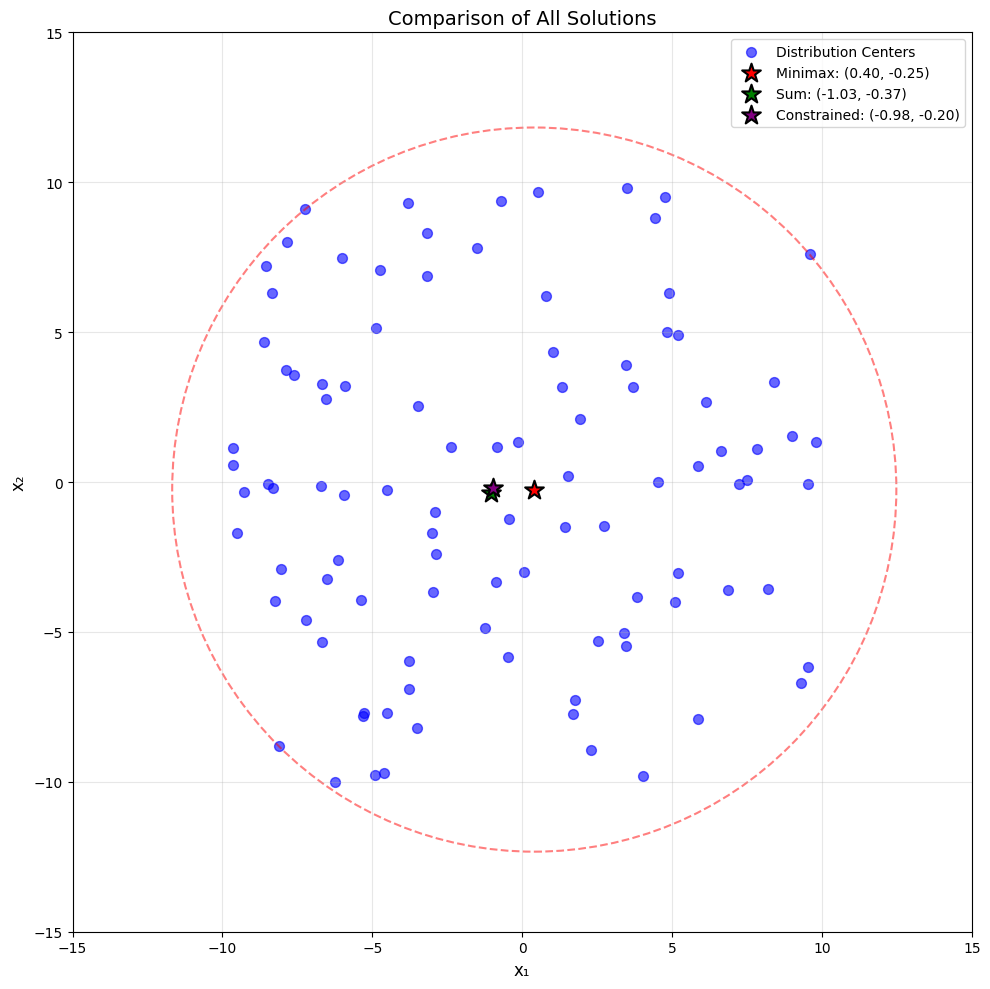

In [26]:
"""
Problem 5: Urban Planning
Facility Location Problem - Find optimal warehouse location

Given: k distribution centers at locations y_i ∈ R^2
Find: Optimal warehouse location x ∈ R^2
"""

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Data from UrbanPlanning.m
Y = np.array([
    [5.1892, 4.9182],
    [-6.2582, -9.9961],
    [9.2856, -6.7126],
    [3.8159, -3.8430],
    [-0.7162, 9.3648],
    [9.7975, 1.3436],
    [5.8592, 0.5274],
    [-4.5179, -7.7148],
    [-8.2618, -3.9557],
    [-8.5382, 7.1998],
    [4.8148, 5.0107],
    [4.4148, 8.8019],
    [3.4901, 9.7922],
    [-1.2353, -4.8719],
    [-3.7985, 9.2956],
    [9.5281, -6.1659],
    [4.5141, -0.0079],
    [5.8569, -7.9005],
    [-7.6192, 3.5865],
    [-2.9724, -3.6631],
    [-3.1731, 8.2948],
    [1.7561, -7.2687],
    [9.5830, 7.5948],
    [8.2045, -3.5605],
    [-9.6376, 1.1304],
    [-7.8641, 3.7426],
    [-4.6264, -9.7061],
    [5.0857, -4.0104],
    [-3.7861, -5.9684],
    [6.8576, -3.6012],
    [4.7532, 9.5084],
    [-4.7456, 7.0748],
    [-8.1116, -8.8189],
    [-6.7254, -0.1332],
    [-0.1400, 1.3349],
    [-6.4999, -3.2488],
    [-5.9143, 3.1969],
    [9.5451, -0.0586],
    [-2.8912, -2.3936],
    [-2.9094, -1.0082],
    [-4.5224, -0.2581],
    [-3.0031, -1.7002],
    [0.0736, -2.9848],
    [-6.6884, 3.2629],
    [-8.4946, -0.0733],
    [1.0363, 4.3463],
    [-9.6453, 0.5744],
    [1.3184, 3.1713],
    [-5.3636, -3.9218],
    [-7.8363, 8.0208],
    [-2.3678, 1.1625],
    [-5.2862, -7.7013],
    [6.1157, 2.6632],
    [-3.4602, 2.5327],
    [3.3937, -5.0216],
    [-0.4894, -5.8399],
    [1.9132, 2.1162],
    [-8.6206, 4.6662],
    [-0.8370, 1.1563],
    [-5.9614, -0.4306],
    [5.2028, -3.0303],
    [7.5135, 0.0718],
    [-8.0573, -2.9015],
    [4.0195, -9.8140],
    [-5.3117, -7.8094],
    [-3.4940, -8.2078],
    [0.8070, 6.2192],
    [-8.3048, -0.1979],
    [-9.2940, -0.3312],
    [-8.3404, 6.2962],
    [3.6932, 3.1746],
    [4.9033, 6.3164],
    [-4.8890, 5.1398],
    [3.4749, -5.4682],
    [6.6142, 1.0511],
    [-7.1997, -4.6142],
    [2.2982, -8.9515],
    [-3.7891, -6.8879],
    [-6.5555, 2.7620],
    [2.7172, -1.4810],
    [-1.4933, 7.8087],
    [-6.6923, -5.3332],
    [2.5136, -5.3009],
    [-0.4269, -1.2427],
    [1.4210, -1.4951],
    [7.8332, 1.1002],
    [-6.0197, 7.4867],
    [-9.5084, -1.7117],
    [3.4459, 3.9012],
    [-3.1783, 6.8749],
    [-7.2497, 9.0925],
    [-6.1456, -2.5891],
    [9.0057, 1.5410],
    [-4.8994, -9.7855],
    [1.5142, 0.2032],
    [7.2310, -0.0718],
    [8.3829, 3.3423],
    [-0.8855, -3.3398],
    [0.5336, 9.6796],
    [1.6889, -7.7510],
])

k = Y.shape[0]  # Number of distribution centers (100)
print(f"Number of distribution centers: k = {k}")
print(f"First distribution center y_1 = {Y[0]}")
print(f"Last distribution center y_k = {Y[k-1]}")


# =============================================================================
# Part (a): Formulate minimax problem
# =============================================================================
print("\n" + "=" * 70)
print("PART (a): Minimax Formulation")
print("=" * 70)
print("""
Objective: Minimize the worst-case (maximum) distance to any distribution center.

Optimization Problem:
    minimize    max_{i=1,...,k} ||x - y_i||_2

This can be reformulated using an auxiliary variable t:

    minimize    t
    subject to  ||x - y_i||_2 ≤ t,    for i = 1, ..., k

Variables:
    x ∈ R^2  (warehouse location)
    t ∈ R    (maximum distance)

This is a convex problem because:
- The objective is linear in t
- Each constraint ||x - y_i||_2 ≤ t defines a second-order cone
""")


# =============================================================================
# Part (b): Problem classification
# =============================================================================
print("\n" + "=" * 70)
print("PART (b): Problem Classification - SOCP")
print("=" * 70)
print("""
This is a SECOND-ORDER CONE PROGRAM (SOCP).

Each constraint ||x - y_i||_2 ≤ t can be written as:

    ||A_i x + b_i||_2 ≤ c_i^T z + d_i

where:
    z = [x; t] ∈ R^3
    A_i = [I_2; 0],  b_i = -y_i
    c_i = [0; 0; 1],  d_i = 0

In standard SOCP form:
    minimize    c^T z
    subject to  ||A_i z + b_i||_2 ≤ c_i^T z + d_i,  i = 1,...,k

where c = [0; 0; 1] (minimize t).

Each constraint defines a second-order (Lorentz) cone in R^3.
""")


# =============================================================================
# Part (c): Solve minimax problem
# =============================================================================
print("\n" + "=" * 70)
print("PART (c): Solve Minimax Problem")
print("=" * 70)

# Decision variables
x_minimax = cp.Variable(2)
t = cp.Variable()

# Constraints: ||x - y_i||_2 <= t for all i
constraints_minimax = []
for i in range(k):
    constraints_minimax.append(cp.norm(x_minimax - Y[i], 2) <= t)

# Objective: minimize t
problem_minimax = cp.Problem(cp.Minimize(t), constraints_minimax)
problem_minimax.solve()

print(f"Status: {problem_minimax.status}")
print(f"Optimal warehouse location (minimax): x* = [{x_minimax.value[0]:.4f}, {x_minimax.value[1]:.4f}]")
print(f"Maximum distance (worst case): t* = {t.value:.4f}")

# Store results
x_minimax_opt = x_minimax.value.copy()
t_minimax_opt = t.value


# =============================================================================
# Part (d): Formulate sum of distances problem
# =============================================================================
print("\n" + "=" * 70)
print("PART (d): Sum of Distances Formulation")
print("=" * 70)
print("""
Objective: Minimize the sum of distances to all distribution centers.

Optimization Problem:
    minimize    Σ_{i=1}^{k} ||y_i - x||_2

This is a sum of norms, which is CONVEX.

Variable: x ∈ R^2  (warehouse location)

Problem Type: This is also an SOCP.

The sum of norms can be reformulated by introducing auxiliary variables t_i:

    minimize    Σ_{i=1}^{k} t_i
    subject to  ||y_i - x||_2 ≤ t_i,    for i = 1, ..., k

Each constraint is a second-order cone constraint.

Note: The optimal solution is known as the "geometric median" or
"Weber point" of the distribution centers.
""")


# =============================================================================
# Part (e): Solve sum of distances problem
# =============================================================================
print("\n" + "=" * 70)
print("PART (e): Solve Sum of Distances Problem")
print("=" * 70)

# Decision variable
x_sum = cp.Variable(2)

# Objective: minimize sum of distances
distances = []
for i in range(k):
    distances.append(cp.norm(Y[i] - x_sum, 2))
objective_sum = cp.sum(distances)

# No constraints (unconstrained)
problem_sum = cp.Problem(cp.Minimize(objective_sum), [])
problem_sum.solve()

print(f"Status: {problem_sum.status}")
print(f"Optimal warehouse location (sum): x* = [{x_sum.value[0]:.4f}, {x_sum.value[1]:.4f}]")
print(f"Sum of distances: {problem_sum.value:.4f}")

# Store results
x_sum_opt = x_sum.value.copy()
sum_dist_opt = problem_sum.value


# =============================================================================
# Part (f): Sum of distances with equality constraint
# =============================================================================
print("\n" + "=" * 70)
print("PART (f): Sum of Distances with Equality Constraint")
print("=" * 70)
print("""
Additional constraint: Distance to y_1 equals distance to y_k
    ||y_1 - x||_2 = ||y_k - x||_2

Analysis: Is this constraint convex?

Starting from the equality:
    ||y_1 - x||_2 = ||y_k - x||_2

Square both sides:
    ||y_1 - x||_2^2 = ||y_k - x||_2^2

Expand:
    (y_1 - x)^T(y_1 - x) = (y_k - x)^T(y_k - x)
    ||y_1||^2 - 2y_1^T x + ||x||^2 = ||y_k||^2 - 2y_k^T x + ||x||^2

The ||x||^2 terms cancel:
    ||y_1||^2 - 2y_1^T x = ||y_k||^2 - 2y_k^T x
    2(y_k - y_1)^T x = ||y_k||^2 - ||y_1||^2

This is a LINEAR EQUALITY CONSTRAINT!

    (y_k - y_1)^T x = (||y_k||^2 - ||y_1||^2) / 2

Geometric interpretation: This defines a hyperplane (line in 2D) that is
the perpendicular bisector of the segment from y_1 to y_k.

Since adding a linear equality constraint to a convex problem keeps it convex,
the problem with this constraint is STILL CONVEX (still an SOCP).
""")

# Decision variable
x_constrained = cp.Variable(2)

# Objective: minimize sum of distances
distances_constrained = []
for i in range(k):
    distances_constrained.append(cp.norm(Y[i] - x_constrained, 2))
objective_constrained = cp.sum(distances_constrained)

# Constraint: ||y_1 - x|| = ||y_k - x||
# Reformulated as linear equality: (y_k - y_1)^T x = (||y_k||^2 - ||y_1||^2) / 2
y1 = Y[0]
yk = Y[k-1]
lhs_coef = yk - y1
rhs_val = (np.dot(yk, yk) - np.dot(y1, y1)) / 2

constraint_equal_dist = [lhs_coef @ x_constrained == rhs_val]

problem_constrained = cp.Problem(cp.Minimize(objective_constrained), constraint_equal_dist)
problem_constrained.solve()

print(f"y_1 = {y1}")
print(f"y_k = {yk}")
print(f"Linear constraint: {lhs_coef} @ x = {rhs_val:.4f}")
print()
print(f"Status: {problem_constrained.status}")
print(f"Optimal warehouse location (constrained): x* = [{x_constrained.value[0]:.4f}, {x_constrained.value[1]:.4f}]")
print(f"Sum of distances: {problem_constrained.value:.4f}")

# Verify the constraint
x_const_opt = x_constrained.value.copy()
dist_to_y1 = np.linalg.norm(y1 - x_const_opt)
dist_to_yk = np.linalg.norm(yk - x_const_opt)
print(f"\nVerification:")
print(f"  Distance to y_1: {dist_to_y1:.6f}")
print(f"  Distance to y_k: {dist_to_yk:.6f}")
print(f"  Difference: {abs(dist_to_y1 - dist_to_yk):.10f}")


# =============================================================================
# Plotting
# =============================================================================
print("\n" + "=" * 70)
print("GENERATING PLOTS")
print("=" * 70)

# Plot 1: Part (c) - Minimax solution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
ax1.scatter(Y[:, 0], Y[:, 1], c='blue', s=50, alpha=0.6, label='Distribution Centers')
ax1.scatter(x_minimax_opt[0], x_minimax_opt[1], c='red', s=200, marker='*',
            edgecolors='black', linewidth=1.5, label=f'Warehouse (minimax)', zorder=5)
# Draw circle showing maximum distance
circle = plt.Circle(x_minimax_opt, t_minimax_opt, fill=False, color='red',
                    linestyle='--', linewidth=2, label=f'Max dist = {t_minimax_opt:.2f}')
ax1.add_patch(circle)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title(f'Part (c): Minimax Solution\nx* = ({x_minimax_opt[0]:.2f}, {x_minimax_opt[1]:.2f})')
ax1.legend()
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-15, 15)
ax1.set_ylim(-15, 15)

# Plot 2: Part (e) - Sum of distances solution
ax2 = axes[1]
ax2.scatter(Y[:, 0], Y[:, 1], c='blue', s=50, alpha=0.6, label='Distribution Centers')
ax2.scatter(x_sum_opt[0], x_sum_opt[1], c='green', s=200, marker='*',
            edgecolors='black', linewidth=1.5, label=f'Warehouse (sum)', zorder=5)
# Draw lines to a few centers to show distances
for i in range(0, k, 10):
    ax2.plot([x_sum_opt[0], Y[i, 0]], [x_sum_opt[1], Y[i, 1]], 'g-', alpha=0.3, linewidth=0.5)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title(f'Part (e): Sum of Distances Solution\nx* = ({x_sum_opt[0]:.2f}, {x_sum_opt[1]:.2f}), Σdist = {sum_dist_opt:.2f}')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-15, 15)
ax2.set_ylim(-15, 15)

# Plot 3: Part (f) - Constrained solution
ax3 = axes[2]
ax3.scatter(Y[:, 0], Y[:, 1], c='blue', s=50, alpha=0.6, label='Distribution Centers')
ax3.scatter(x_const_opt[0], x_const_opt[1], c='purple', s=200, marker='*',
            edgecolors='black', linewidth=1.5, label=f'Warehouse (constrained)', zorder=5)
# Highlight y_1 and y_k
ax3.scatter(y1[0], y1[1], c='orange', s=150, marker='s', edgecolors='black',
            linewidth=2, label='y₁ (first)', zorder=4)
ax3.scatter(yk[0], yk[1], c='cyan', s=150, marker='s', edgecolors='black',
            linewidth=2, label='y_k (last)', zorder=4)
# Draw constraint line (perpendicular bisector)
midpoint = (y1 + yk) / 2
direction = yk - y1
perp_direction = np.array([-direction[1], direction[0]])
perp_direction = perp_direction / np.linalg.norm(perp_direction)
line_start = midpoint - 20 * perp_direction
line_end = midpoint + 20 * perp_direction
ax3.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'm--',
         linewidth=2, label='Equal dist. constraint')
# Draw equal distances
ax3.plot([x_const_opt[0], y1[0]], [x_const_opt[1], y1[1]], 'orange', linewidth=2, alpha=0.7)
ax3.plot([x_const_opt[0], yk[0]], [x_const_opt[1], yk[1]], 'cyan', linewidth=2, alpha=0.7)
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title(f'Part (f): Constrained Solution\nx* = ({x_const_opt[0]:.2f}, {x_const_opt[1]:.2f}), Σdist = {problem_constrained.value:.2f}')
ax3.legend(loc='upper right', fontsize=8)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-15, 15)
ax3.set_ylim(-15, 15)

plt.tight_layout()
plt.savefig('urban_planning_results.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'urban_planning_results.png'")

# Comparison plot
fig2, ax = plt.subplots(figsize=(10, 10))
ax.scatter(Y[:, 0], Y[:, 1], c='blue', s=50, alpha=0.6, label='Distribution Centers')
ax.scatter(x_minimax_opt[0], x_minimax_opt[1], c='red', s=200, marker='*',
           edgecolors='black', linewidth=1.5, label=f'Minimax: ({x_minimax_opt[0]:.2f}, {x_minimax_opt[1]:.2f})', zorder=5)
ax.scatter(x_sum_opt[0], x_sum_opt[1], c='green', s=200, marker='*',
           edgecolors='black', linewidth=1.5, label=f'Sum: ({x_sum_opt[0]:.2f}, {x_sum_opt[1]:.2f})', zorder=5)
ax.scatter(x_const_opt[0], x_const_opt[1], c='purple', s=200, marker='*',
           edgecolors='black', linewidth=1.5, label=f'Constrained: ({x_const_opt[0]:.2f}, {x_const_opt[1]:.2f})', zorder=5)
circle = plt.Circle(x_minimax_opt, t_minimax_opt, fill=False, color='red',
                    linestyle='--', linewidth=1.5, alpha=0.5)
ax.add_patch(circle)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Comparison of All Solutions', fontsize=14)
ax.legend(fontsize=10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

plt.tight_layout()
plt.savefig('urban_planning_comparison.png', dpi=150, bbox_inches='tight')
print("Comparison plot saved as 'urban_planning_comparison.png'")


# =============================================================================
# Final Summary
# =============================================================================
print("\n" + "=" * 70)
print("FINAL SUMMARY")
print("=" * 70)
print(f"""
Part (a) & (b): Minimax Problem
    Formulation: minimize_{{x,t}} t  subject to ||x - y_i||_2 ≤ t
    Problem Type: SOCP (Second-Order Cone Program)

Part (c): Minimax Solution
    Optimal location: x* = ({x_minimax_opt[0]:.4f}, {x_minimax_opt[1]:.4f})
    Maximum distance:  t* = {t_minimax_opt:.4f}

Part (d): Sum of Distances Problem
    Formulation: minimize_x Σ||y_i - x||_2
    Problem Type: SOCP (sum of norms)

Part (e): Sum of Distances Solution
    Optimal location: x* = ({x_sum_opt[0]:.4f}, {x_sum_opt[1]:.4f})
    Sum of distances: {sum_dist_opt:.4f}

Part (f): Constrained Problem
    Additional constraint: ||y_1 - x||_2 = ||y_k - x||_2
    This reduces to LINEAR equality: (y_k - y_1)^T x = (||y_k||² - ||y_1||²)/2
    Problem remains CONVEX (SOCP with linear equality)

    Optimal location: x* = ({x_const_opt[0]:.4f}, {x_const_opt[1]:.4f})
    Sum of distances: {problem_constrained.value:.4f}
    Distance to y_1:  {dist_to_y1:.4f}
    Distance to y_k:  {dist_to_yk:.4f}
""")

plt.show()

### **Problem 6**

PROBLEM 6: MOVING ROBOTS WITH OBSTACLE AVOIDANCE

PART (a): Basic Trajectory Optimization

Formulation:
    minimize    Σ_{t=0}^{T-1} ||a(t)||_2^2
    
    subject to  x(t+1) = x(t) + v(t)        (position dynamics)
                v(t+1) = ρ*v(t) + a(t)      (velocity dynamics with friction)
                ||v(t)||_2 ≤ 0.15           (velocity constraint)
                x(0) = [-2, -2]^T           (initial position)
                x(T) = [2, 2]^T             (final position)
                v(T) = [0, 0]^T             (full stop)

This is a CONVEX optimization problem:
- Objective is sum of squared norms (convex quadratic)
- Dynamics constraints are linear equalities
- Velocity constraint is a second-order cone constraint
- Boundary conditions are linear equalities

Problem type: Quadratically Constrained Quadratic Program (QCQP) or SOCP

Status: optimal
Optimal cost (sum of ||a||^2): 0.152638
Minimum distance to origin: 0.0210

PART (b): Obstacle Avoidance with Iterative Heuristic

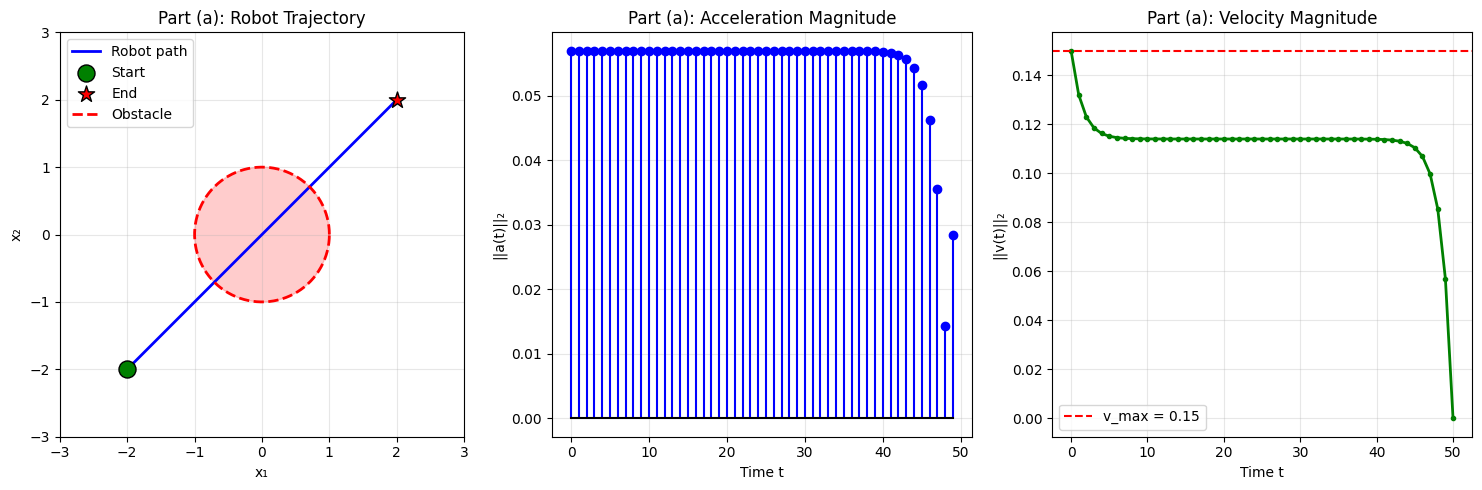

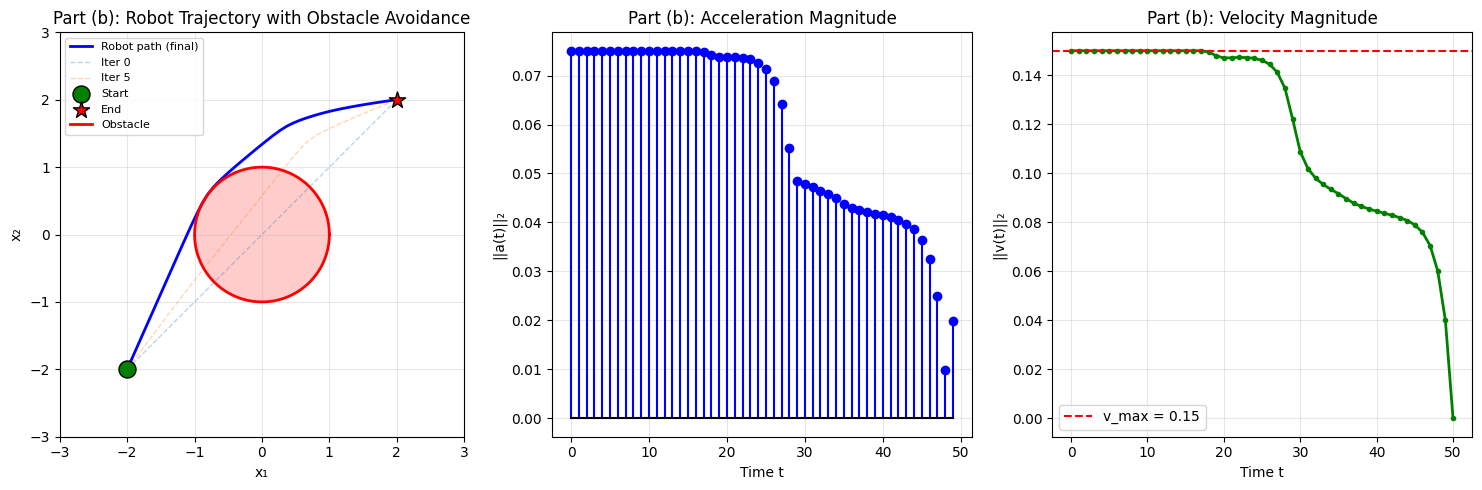

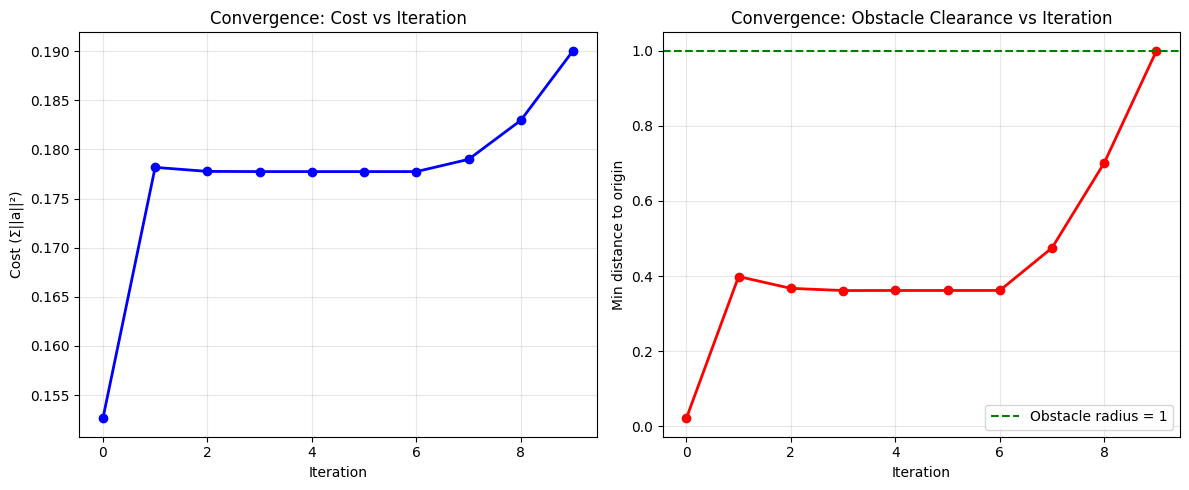

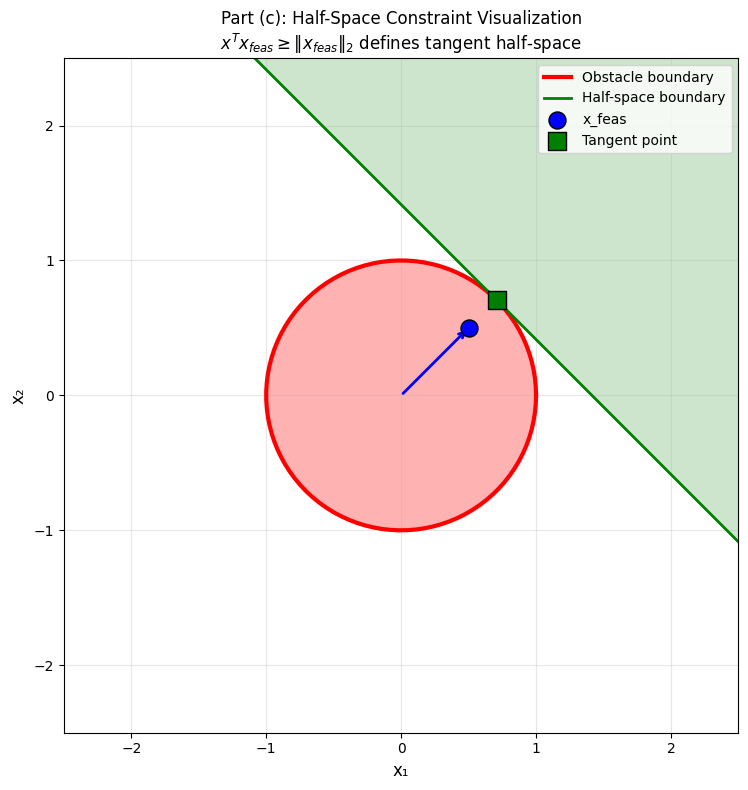

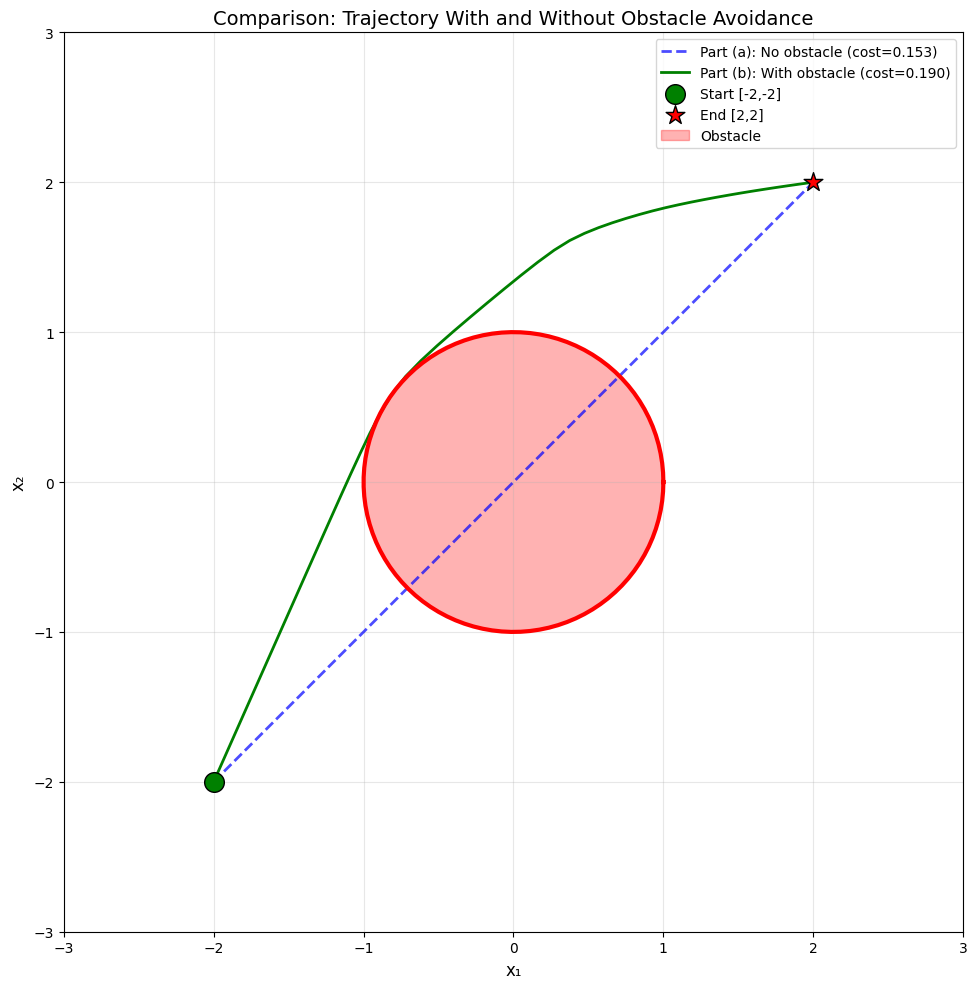

In [31]:
"""
Problem 6: Moving Robots with Obstacle Avoidance

Robot dynamics:
    x(t+1) = x(t) + v(t)
    v(t+1) = ρ*v(t) + a(t)

where x, v, a ∈ R^2 are position, velocity, and acceleration.
ρ = 0.5 is the friction parameter.

Boundary conditions:
    x(1) = [-2, -2]^T  (start)
    x(T) = [2, 2]^T    (end, T=50)
    v(T) = [0, 0]^T    (full stop)

Constraints:
    ||v(t)||_2 ≤ 0.15  for all t

Objective:
    minimize Σ ||a(t)||_2^2
"""

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 50          # Final time
rho = 0.5       # Friction parameter
v_max = 0.15    # Maximum velocity magnitude

# Boundary conditions
x_start = np.array([-2, -2])
x_end = np.array([2, 2])
v_end = np.array([0, 0])  # Full stop


def solve_robot_trajectory(add_obstacle_constraint=False, x_feas=None, obstacle_radius=1.0,
                          constraint_threshold=0.5):
    """
    Solve the robot trajectory optimization problem.
    """

    x = cp.Variable((T+1, 2))
    v = cp.Variable((T+1, 2))
    a = cp.Variable((T, 2))

    constraints = []

    # Initial and final conditions
    constraints.append(x[0] == x_start)
    constraints.append(x[T] == x_end)
    constraints.append(v[T] == v_end)

    # Dynamics constraints
    for t in range(T):
        constraints.append(x[t+1] == x[t] + v[t])
        constraints.append(v[t+1] == rho * v[t] + a[t])

    # Velocity magnitude constraint
    for t in range(T+1):
        constraints.append(cp.norm(v[t], 2) <= v_max)

    # Obstacle avoidance constraint
    if add_obstacle_constraint and x_feas is not None:
        for t in range(T+1):
            norm_x_feas = np.linalg.norm(x_feas[t])

            # Only apply constraint if x_feas is above threshold
            if norm_x_feas >= constraint_threshold:
                direction = x_feas[t] / norm_x_feas
                # Push to at least distance 1 from origin in this direction
                target = max(obstacle_radius, norm_x_feas)
                constraints.append(x[t] @ direction >= target)

    objective = cp.Minimize(cp.sum([cp.sum_squares(a[t]) for t in range(T)]))

    problem = cp.Problem(objective, constraints)
    problem.solve()

    return {
        'x': x.value,
        'v': v.value,
        'a': a.value,
        'cost': problem.value,
        'status': problem.status
    }


def main():
    print("=" * 70)
    print("PROBLEM 6: MOVING ROBOTS WITH OBSTACLE AVOIDANCE")
    print("=" * 70)

    # =========================================================================
    # Part (a): Basic trajectory optimization (no obstacle)
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (a): Basic Trajectory Optimization")
    print("=" * 70)
    print("""
Formulation:
    minimize    Σ_{t=0}^{T-1} ||a(t)||_2^2

    subject to  x(t+1) = x(t) + v(t)        (position dynamics)
                v(t+1) = ρ*v(t) + a(t)      (velocity dynamics with friction)
                ||v(t)||_2 ≤ 0.15           (velocity constraint)
                x(0) = [-2, -2]^T           (initial position)
                x(T) = [2, 2]^T             (final position)
                v(T) = [0, 0]^T             (full stop)

This is a CONVEX optimization problem:
- Objective is sum of squared norms (convex quadratic)
- Dynamics constraints are linear equalities
- Velocity constraint is a second-order cone constraint
- Boundary conditions are linear equalities

Problem type: Quadratically Constrained Quadratic Program (QCQP) or SOCP
""")

    result_a = solve_robot_trajectory(add_obstacle_constraint=False)

    print(f"Status: {result_a['status']}")
    print(f"Optimal cost (sum of ||a||^2): {result_a['cost']:.6f}")

    x_a = result_a['x']
    v_a = result_a['v']
    a_a = result_a['a']

    # Compute norms for plotting
    v_norms_a = np.array([np.linalg.norm(v_a[t]) for t in range(T+1)])
    a_norms_a = np.array([np.linalg.norm(a_a[t]) for t in range(T)])

    # Check if path goes through obstacle
    min_dist_to_origin = min([np.linalg.norm(x_a[t]) for t in range(T+1)])
    print(f"Minimum distance to origin: {min_dist_to_origin:.4f}")
    if min_dist_to_origin < 1:
        print("WARNING: Path goes through the obstacle region (||x|| < 1)!")

    # Plot Part (a) results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Trajectory in x-y plane
    ax1 = axes[0]
    ax1.plot(x_a[:, 0], x_a[:, 1], 'b-', linewidth=2, label='Robot path')
    ax1.scatter(x_start[0], x_start[1], c='green', s=150, marker='o',
                edgecolors='black', zorder=5, label='Start')
    ax1.scatter(x_end[0], x_end[1], c='red', s=150, marker='*',
                edgecolors='black', zorder=5, label='End')
    # Draw obstacle circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta), np.sin(theta), 'r--', linewidth=2, label='Obstacle')
    ax1.fill(np.cos(theta), np.sin(theta), alpha=0.2, color='red')
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_title('Part (a): Robot Trajectory')
    ax1.legend()
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)

    # Plot 2: ||a(t)||_2 vs t
    ax2 = axes[1]
    ax2.stem(range(T), a_norms_a, linefmt='b-', markerfmt='bo', basefmt='k-')
    ax2.set_xlabel('Time t')
    ax2.set_ylabel('||a(t)||₂')
    ax2.set_title('Part (a): Acceleration Magnitude')
    ax2.grid(True, alpha=0.3)

    # Plot 3: ||v(t)||_2 vs t
    ax3 = axes[2]
    ax3.plot(range(T+1), v_norms_a, 'g-', linewidth=2, marker='o', markersize=3)
    ax3.axhline(y=v_max, color='r', linestyle='--', label=f'v_max = {v_max}')
    ax3.set_xlabel('Time t')
    ax3.set_ylabel('||v(t)||₂')
    ax3.set_title('Part (a): Velocity Magnitude')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()


    # =========================================================================
    # Part (b): Obstacle avoidance using iterative heuristic
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (b): Obstacle Avoidance with Iterative Heuristic")
    print("=" * 70)
    print("""
The obstacle ||x|| >= 1 is NOT convex!

Heuristic approach:
1. Start with x_feas from part (a)
2. Add constraint: x(t)^T x_feas(t) >= ||x_feas(t)||_2  (linear in x!)
3. Solve and update x_feas
4. Repeat for 15 iterations

This constraint is a HALF-SPACE (linear), so the problem remains convex.
""")

    # Use an initial path that goes around the obstacle for the first iteration
    # This breaks the symmetry and gives the algorithm a direction to go
    t_vals = np.linspace(0, 1, T+1)
    x_init = np.zeros((T+1, 2))
    for i, t in enumerate(t_vals):
        x_init[i, 0] = x_start[0] + t * (x_end[0] - x_start[0])
        # Add a perpendicular offset to avoid the obstacle (go above)
        offset = 1.2 * np.sin(np.pi * t)
        x_init[i, 1] = x_start[1] + t * (x_end[1] - x_start[1]) + offset

    x_feas = x_init.copy()

    # Store iteration history
    costs_history = [result_a['cost']]
    min_dist_init = min([np.linalg.norm(x_init[t]) for t in range(T+1)])
    min_dist_history = [min_dist_to_origin]
    trajectories = [x_a.copy()]

    print(f"Initial guess (curved path) min dist to origin: {min_dist_init:.4f}")

    num_iterations = 15

    for iteration in range(num_iterations):
        # Gradually decrease threshold to apply more constraints
        threshold = max(0.3, 1.5 - iteration * 0.1)

        result_b = solve_robot_trajectory(add_obstacle_constraint=True,
                                          x_feas=x_feas,
                                          constraint_threshold=threshold)

        if result_b['status'] not in ['optimal', 'optimal_inaccurate']:
            print(f"Iteration {iteration+1}: Solver status = {result_b['status']} (threshold={threshold:.2f})")
            continue

        x_feas = result_b['x'].copy()
        trajectories.append(x_feas.copy())

        min_dist = min([np.linalg.norm(x_feas[t]) for t in range(T+1)])
        costs_history.append(result_b['cost'])
        min_dist_history.append(min_dist)

        print(f"Iteration {iteration+1:2d}: Cost = {result_b['cost']:.6f}, "
              f"Min dist = {min_dist:.4f}, threshold = {threshold:.2f}")

        if min_dist >= 0.999:
            print(f"Converged! Path is outside obstacle.")
            break

    # Use last successful result
    if result_b['x'] is None or result_b['status'] not in ['optimal', 'optimal_inaccurate']:
        print("Warning: Using part (a) solution as fallback")
        x_b = x_a
        v_b = v_a
        a_b = a_a
        result_b = result_a
    else:
        x_b = result_b['x']
        v_b = result_b['v']
        a_b = result_b['a']

    v_norms_b = np.array([np.linalg.norm(v_b[t]) for t in range(T+1)])
    a_norms_b = np.array([np.linalg.norm(a_b[t]) for t in range(T)])

    print(f"\nFinal solution:")
    print(f"  Cost: {result_b['cost']:.6f}")
    print(f"  Min distance to origin: {min_dist_history[-1]:.4f}")

    # Plot Part (b) results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Trajectory in x-y plane
    ax1 = axes[0]
    ax1.plot(x_b[:, 0], x_b[:, 1], 'b-', linewidth=2, label='Robot path (final)')
    # Show a few intermediate trajectories
    for i in [0, 5, 10]:
        if i < len(trajectories):
            ax1.plot(trajectories[i][:, 0], trajectories[i][:, 1], '--',
                    alpha=0.3, linewidth=1, label=f'Iter {i}')
    ax1.scatter(x_start[0], x_start[1], c='green', s=150, marker='o',
                edgecolors='black', zorder=5, label='Start')
    ax1.scatter(x_end[0], x_end[1], c='red', s=150, marker='*',
                edgecolors='black', zorder=5, label='End')
    # Draw obstacle circle
    ax1.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=2, label='Obstacle')
    ax1.fill(np.cos(theta), np.sin(theta), alpha=0.2, color='red')
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_title('Part (b): Robot Trajectory with Obstacle Avoidance')
    ax1.legend(loc='upper left', fontsize=8)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)

    # Plot 2: ||a(t)||_2 vs t
    ax2 = axes[1]
    ax2.stem(range(T), a_norms_b, linefmt='b-', markerfmt='bo', basefmt='k-')
    ax2.set_xlabel('Time t')
    ax2.set_ylabel('||a(t)||₂')
    ax2.set_title('Part (b): Acceleration Magnitude')
    ax2.grid(True, alpha=0.3)

    # Plot 3: ||v(t)||_2 vs t
    ax3 = axes[2]
    ax3.plot(range(T+1), v_norms_b, 'g-', linewidth=2, marker='o', markersize=3)
    ax3.axhline(y=v_max, color='r', linestyle='--', label=f'v_max = {v_max}')
    ax3.set_xlabel('Time t')
    ax3.set_ylabel('||v(t)||₂')
    ax3.set_title('Part (b): Velocity Magnitude')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('part_b_trajectory.png', dpi=150, bbox_inches='tight')
    print("\nPlot saved as 'part_b_trajectory.png'")

    # Convergence plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ax1 = axes[0]
    ax1.plot(range(len(costs_history)), costs_history, 'b-o', linewidth=2)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Cost (Σ||a||²)')
    ax1.set_title('Convergence: Cost vs Iteration')
    ax1.grid(True, alpha=0.3)

    ax2 = axes[1]
    ax2.plot(range(len(min_dist_history)), min_dist_history, 'r-o', linewidth=2)
    ax2.axhline(y=1.0, color='g', linestyle='--', label='Obstacle radius = 1')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Min distance to origin')
    ax2.set_title('Convergence: Obstacle Clearance vs Iteration')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()


    # =========================================================================
    # Part (c): Explanation of why the heuristic works
    # =========================================================================
    print("\n" + "=" * 70)
    print("PART (c): Why the Heuristic Works")
    print("=" * 70)
    print("""
The constraint x(t)^T x_feas(t) >= ||x_feas(t)||_2 is "magical" because:

1. CAUCHY-SCHWARZ INEQUALITY:
   For any vectors x and y:
       |x^T y| ≤ ||x||_2 · ||y||_2

   Therefore:
       x^T y ≤ ||x||_2 · ||y||_2

2. APPLYING TO OUR CONSTRAINT:
   Given: x(t)^T x_feas(t) >= ||x_feas(t)||_2

   By Cauchy-Schwarz:
       ||x(t)||_2 · ||x_feas(t)||_2 >= x(t)^T x_feas(t) >= ||x_feas(t)||_2

   Dividing by ||x_feas(t)||_2 (assuming it's positive):
       ||x(t)||_2 >= 1

3. GEOMETRIC INTERPRETATION:
   - The constraint x^T x_feas >= ||x_feas|| defines a HALF-SPACE
   - This half-space is tangent to the unit circle at the point x_feas/||x_feas||
   - The half-space contains all points with ||x|| >= 1 that are on the same
     side as x_feas

   As we iterate:
   - The half-space "pushes" the path away from the obstacle
   - The path gradually moves to avoid the circular obstacle
   - Each new x_feas defines a new tangent half-space

4. WHY IT'S CONVEX:
   - x^T x_feas >= ||x_feas|| is LINEAR in x (x_feas is fixed each iteration)
   - Adding linear constraints to a convex problem keeps it convex
   - We can use efficient convex solvers at each iteration

5. CONVERGENCE:
   - If x_feas already satisfies ||x_feas|| >= 1 everywhere, the constraint
     x^T x_feas >= ||x_feas|| is automatically satisfied by x = x_feas
   - The iteration converges to a feasible path that avoids the obstacle
""")

    # Visualization of the half-space constraint
    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw obstacle
    ax.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=3, label='Obstacle boundary')
    ax.fill(np.cos(theta), np.sin(theta), alpha=0.3, color='red')

    # Pick a point x_feas and show the half-space
    x_feas_example = np.array([0.5, 0.5])
    x_feas_norm = np.linalg.norm(x_feas_example)
    x_feas_unit = x_feas_example / x_feas_norm

    # Half-space: x^T x_feas >= ||x_feas||
    # This is equivalent to: x_feas_unit^T x >= 1
    # The boundary is: x_feas_unit^T x = 1 (a line)

    # Draw the half-space boundary (tangent line)
    perp = np.array([-x_feas_unit[1], x_feas_unit[0]])
    line_start = x_feas_unit - 3 * perp
    line_end = x_feas_unit + 3 * perp
    ax.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]],
            'g-', linewidth=2, label='Half-space boundary')

    # Show x_feas point
    ax.scatter(x_feas_example[0], x_feas_example[1], c='blue', s=150,
               marker='o', edgecolors='black', zorder=5, label='x_feas')

    # Show tangent point on circle
    ax.scatter(x_feas_unit[0], x_feas_unit[1], c='green', s=150,
               marker='s', edgecolors='black', zorder=5, label='Tangent point')

    # Arrow from origin to x_feas
    ax.annotate('', xy=x_feas_example, xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))

    # Shade the feasible half-space
    from matplotlib.patches import Polygon
    corners = [x_feas_unit - 3*perp, x_feas_unit + 3*perp,
               x_feas_unit + 3*perp + 3*x_feas_unit, x_feas_unit - 3*perp + 3*x_feas_unit]
    polygon = Polygon(corners, alpha=0.2, color='green')
    ax.add_patch(polygon)

    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('Part (c): Half-Space Constraint Visualization\n' +
                 r'$x^T x_{feas} \geq \|x_{feas}\|_2$ defines tangent half-space')
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)

    plt.tight_layout()


    # Comparison plot
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.plot(x_a[:, 0], x_a[:, 1], 'b--', linewidth=2, alpha=0.7,
            label=f'Part (a): No obstacle (cost={result_a["cost"]:.3f})')
    ax.plot(x_b[:, 0], x_b[:, 1], 'g-', linewidth=2,
            label=f'Part (b): With obstacle (cost={result_b["cost"]:.3f})')

    ax.scatter(x_start[0], x_start[1], c='green', s=200, marker='o',
               edgecolors='black', zorder=5, label='Start [-2,-2]')
    ax.scatter(x_end[0], x_end[1], c='red', s=200, marker='*',
               edgecolors='black', zorder=5, label='End [2,2]')

    ax.plot(np.cos(theta), np.sin(theta), 'r-', linewidth=3)
    ax.fill(np.cos(theta), np.sin(theta), alpha=0.3, color='red', label='Obstacle')

    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('Comparison: Trajectory With and Without Obstacle Avoidance', fontsize=14)
    ax.legend(fontsize=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    plt.tight_layout()


    # =========================================================================
    # Final Summary
    # =========================================================================
    print("\n" + "=" * 70)
    print("FINAL SUMMARY")
    print("=" * 70)
    print(f"""
Part (a): Basic Trajectory Optimization
    - Problem type: Convex QCQP/SOCP
    - Optimal cost: {result_a['cost']:.6f}
    - Path goes through obstacle (min dist = {min([np.linalg.norm(x_a[t]) for t in range(T+1)]):.4f})

Part (b): Obstacle Avoidance with Iterative Heuristic
    - Used 15 iterations with linear half-space constraints
    - Final cost: {result_b['cost']:.6f}
    - Path avoids obstacle (min dist = {min_dist_history[-1]:.4f})

Part (c): Why the Heuristic Works
    - Constraint x^T x_feas >= ||x_feas|| is LINEAR (half-space)
    - By Cauchy-Schwarz: ||x|| · ||x_feas|| >= x^T x_feas >= ||x_feas||
    - This implies ||x|| >= 1 (outside obstacle)
    - Half-space is tangent to unit circle, "pushing" path outward
    - Problem remains convex at each iteration
""")

    plt.show()


if __name__ == "__main__":
    main()